# Housing Activity Forecast - Dallas Fort Worth Metroplex
# Data Science


# SARIMA - Median Price & Sales

In [ ]:
#Connect Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks//Data Science Colab/combined_housing+mortgage - Sheet1.csv")
df.head()


DATE  FEDFUNDS  MORTGAGE30US                  Market Name  Sales  \
0  1990-01-01      8.23        9.8950  Dallas-Fort Worth-Arlington   1916   
1  1990-02-01      8.24       10.1975  Dallas-Fort Worth-Arlington   1663   
2  1990-03-01      8.28       10.2680  Dallas-Fort Worth-Arlington   2596   
3  1990-04-01      8.26       10.3700  Dallas-Fort Worth-Arlington   2362   
4  1990-05-01      8.18       10.4775  Dallas-Fort Worth-Arlington   2491   

   Sales YoY%  Dollar Volume  Dollar Volume YoY%  Average Price  Median Price  \
0         0.0      201885088                 0.0         105368         86453   
1         0.0      177856187                 0.0         106949         85389   
2         0.0      271513044                 0.0         104589         84544   
3         0.0      252715104                 0.0         106992         83737   
4         0.0      279649624                 0.0         112264         84154   

   Active Listings EOM  Months Inventory  
0                30166             15.74  
1                30656             17.13  
2                31481             15.29  
3                32050             15.02  
4                32106             14.56

In [ ]:
#Check for missing values

missing_values_new = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values_new)

Missing values in the dataset:
DATE                   0
FEDFUNDS               0
MORTGAGE30US           0
Market Name            0
Sales                  0
Sales YoY%             0
Dollar Volume          0
Dollar Volume YoY%     0
Average Price          0
Median Price           0
Active Listings EOM    0
Months Inventory       0
dtype: int64


In [ ]:
#Convert 'Date' to datetime and set it as index

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)


In [ ]:
#Create a holdout period:

#Exclude the last four observations for the holdout period
#Create a holdout period:

PriceHold = df.iloc[:-4]

PriceHold

FEDFUNDS  MORTGAGE30US                  Market Name  Sales  \
DATE                                                                     
1990-01-01      8.23        9.8950  Dallas-Fort Worth-Arlington   1916   
1990-02-01      8.24       10.1975  Dallas-Fort Worth-Arlington   1663   
1990-03-01      8.28       10.2680  Dallas-Fort Worth-Arlington   2596   
1990-04-01      8.26       10.3700  Dallas-Fort Worth-Arlington   2362   
1990-05-01      8.18       10.4775  Dallas-Fort Worth-Arlington   2491   
...              ...           ...                          ...    ...   
2023-12-01      5.33        6.8150  Dallas-Fort Worth-Arlington   6391   
2024-01-01      5.33        6.6425  Dallas-Fort Worth-Arlington   5266   
2024-02-01      5.33        6.7760  Dallas-Fort Worth-Arlington   6644   
2024-03-01      5.33        6.8200  Dallas-Fort Worth-Arlington   7818   
2024-04-01      5.33        6.9925  Dallas-Fort Worth-Arlington   8507   

            Sales YoY%  Dollar Volume  Dollar Volume YoY%  Average Price  \
DATE                                                                       
1990-01-01      0.0000      201885088              0.0000         105368   
1990-02-01      0.0000      177856187              0.0000         106949   
1990-03-01      0.0000      271513044              0.0000         104589   
1990-04-01      0.0000      252715104              0.0000         106992   
1990-05-01      0.0000      279649624              0.0000         112264   
...                ...            ...                 ...            ...   
2023-12-01     -0.0485     3114822479              0.0169         487376   
2024-01-01      0.1276     2478483190              0.1618         470657   
2024-02-01     -0.0097     3150578414              0.0128         474199   
2024-03-01     -0.0785     3839266585             -0.0312         491080   
2024-04-01      0.0760     4292560868              0.1041         504591   

            Median Price  Active Listings EOM  Months Inventory  
DATE                                                             
1990-01-01         86453                30166             15.74  
1990-02-01         85389                30656             17.13  
1990-03-01         84544                31481             15.29  
1990-04-01         83737                32050             15.02  
1990-05-01         84154                32106             14.56  
...                  ...                  ...               ...  
2023-12-01        390000                18775              2.52  
2024-01-01        383202                19173              2.56  
2024-02-01        389323                20340              2.72  
2024-03-01        395000                21947              2.95  
2024-04-01        405000                23587              3.15  

[412 rows x 11 columns]

#### STL Decomposition

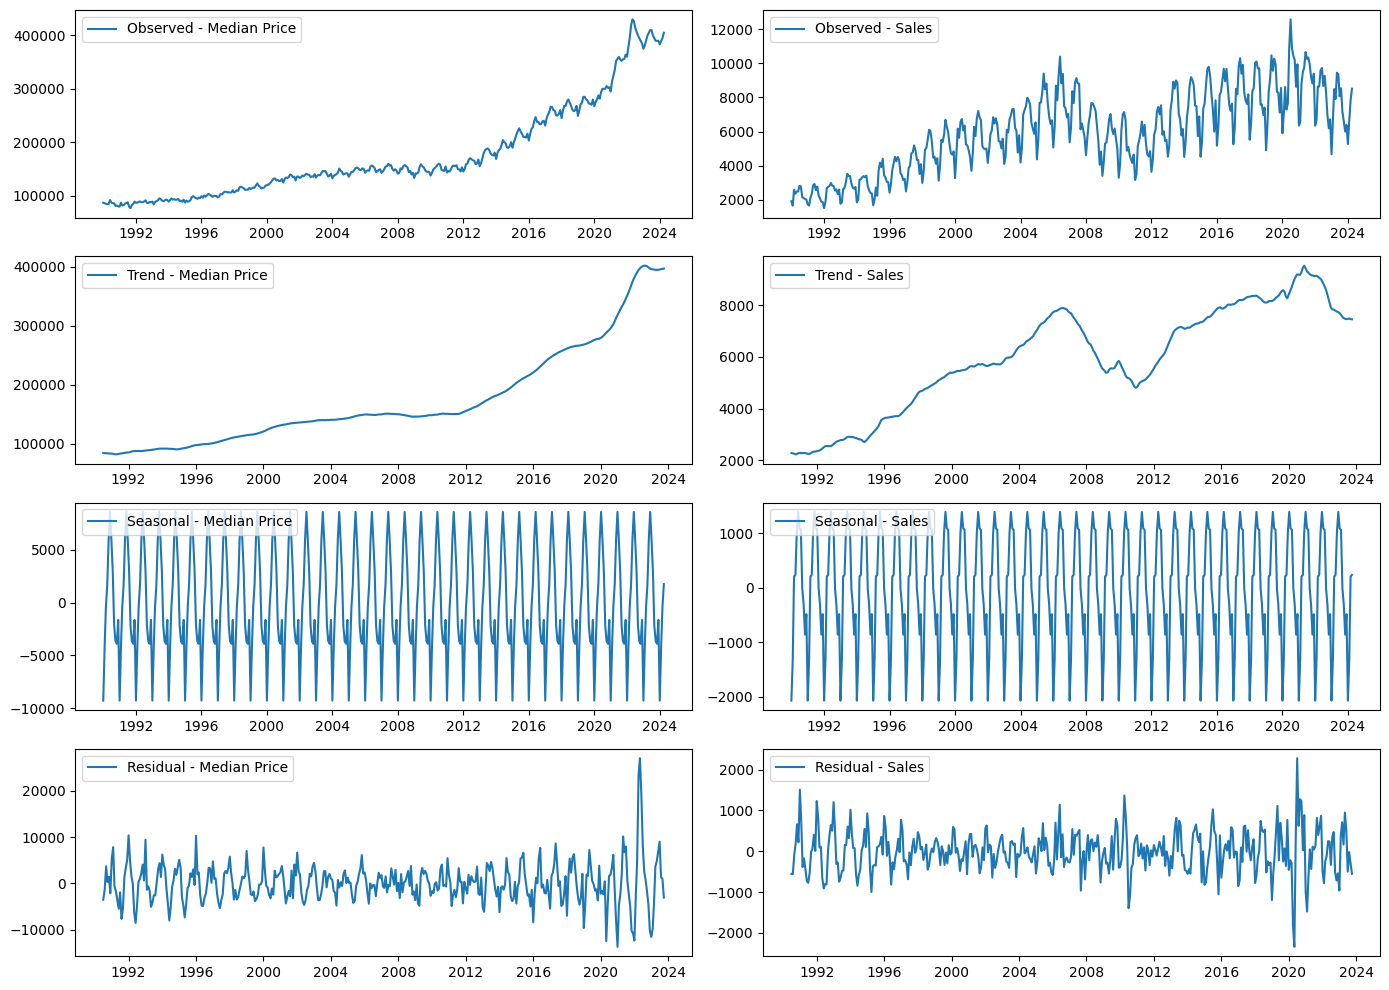

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

#Decompose the Median Price series with a monthly frequency (12 periods for yearly seasonality)
decomposition_price = seasonal_decompose(PriceHold['Median Price'], model='additive', period=12)

#Decompose the Sales series with a monthly frequency (12 periods for yearly seasonality)
decomposition_sales = seasonal_decompose(PriceHold['Sales'], model='additive', period=12)

#Plot the decomposed components for Median Price
plt.figure(figsize=(14, 10))
plt.subplot(4, 2, 1)
plt.plot(decomposition_price.observed, label='Observed - Median Price')
plt.legend(loc='upper left')
plt.subplot(4, 2, 3)
plt.plot(decomposition_price.trend, label='Trend - Median Price')
plt.legend(loc='upper left')
plt.subplot(4, 2, 5)
plt.plot(decomposition_price.seasonal, label='Seasonal - Median Price')
plt.legend(loc='upper left')
plt.subplot(4, 2, 7)
plt.plot(decomposition_price.resid, label='Residual - Median Price')
plt.legend(loc='upper left')

#Plot the decomposed components for Sales
plt.subplot(4, 2, 2)
plt.plot(decomposition_sales.observed, label='Observed - Sales')
plt.legend(loc='upper left')
plt.subplot(4, 2, 4)
plt.plot(decomposition_sales.trend, label='Trend - Sales')
plt.legend(loc='upper left')
plt.subplot(4, 2, 6)
plt.plot(decomposition_sales.seasonal, label='Seasonal - Sales')
plt.legend(loc='upper left')
plt.subplot(4, 2, 8)
plt.plot(decomposition_sales.resid, label='Residual - Sales')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


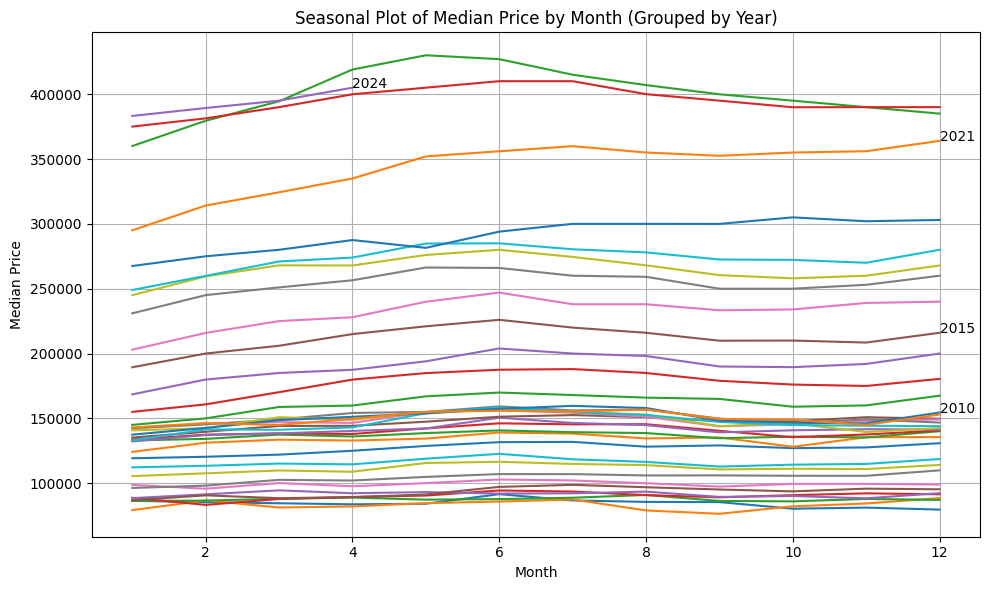

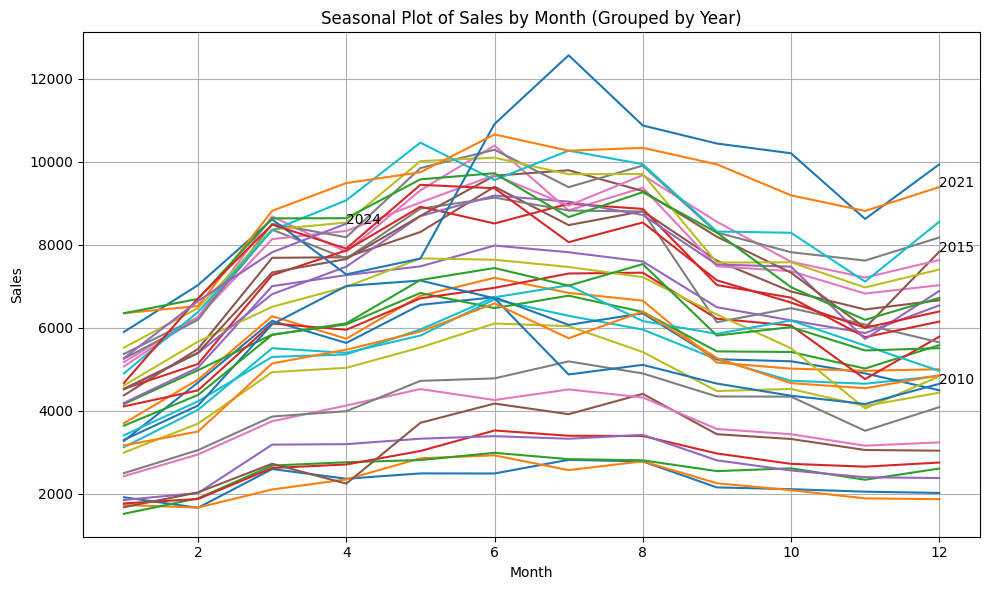

In [ ]:
#Seasonality Visualization


import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------ MEDIAN PRICE ------------------------------------------

#Temporarily create 'Month' and 'Year' columns for plotting
temp_df = PriceHold.copy()
temp_df['Month'] = temp_df.index.month
temp_df['Year'] = temp_df.index.year.astype(str)

#Create a seasonal plot for Median Price by Month, grouped by Year, without the full Year legend
plt.figure(figsize=(10, 6))

#Create the line plot for Median Price without the legend
sns.lineplot(x='Month', y='Median Price', hue='Year', data=temp_df, palette='tab10', legend=False)

#Label specific years at the end of their lines
for year in ['2010', '2015', '2021', '2024']:  # Select the years you want to label
    year_data = temp_df[temp_df['Year'] == year]
    plt.text(year_data['Month'].iloc[-1], year_data['Median Price'].iloc[-1], year,
             horizontalalignment='left', size='medium', color='black')

plt.title('Seasonal Plot of Median Price by Month (Grouped by Year)')
plt.xlabel('Month')
plt.ylabel('Median Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------ SALES ------------------------------------------

#Create a seasonal plot for Sales by Month, grouped by Year, without the full Year legend
plt.figure(figsize=(10, 6))

#Create the line plot for Sales without the legend
sns.lineplot(x='Month', y='Sales', hue='Year', data=temp_df, palette='tab10', legend=False)

#Label specific years at the end of their lines
for year in ['2010', '2015', '2021', '2024']:  # Select the years you want to label
    year_data = temp_df[temp_df['Year'] == year]
    plt.text(year_data['Month'].iloc[-1], year_data['Sales'].iloc[-1], year,
             horizontalalignment='left', size='medium', color='black')

plt.title('Seasonal Plot of Sales by Month (Grouped by Year)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


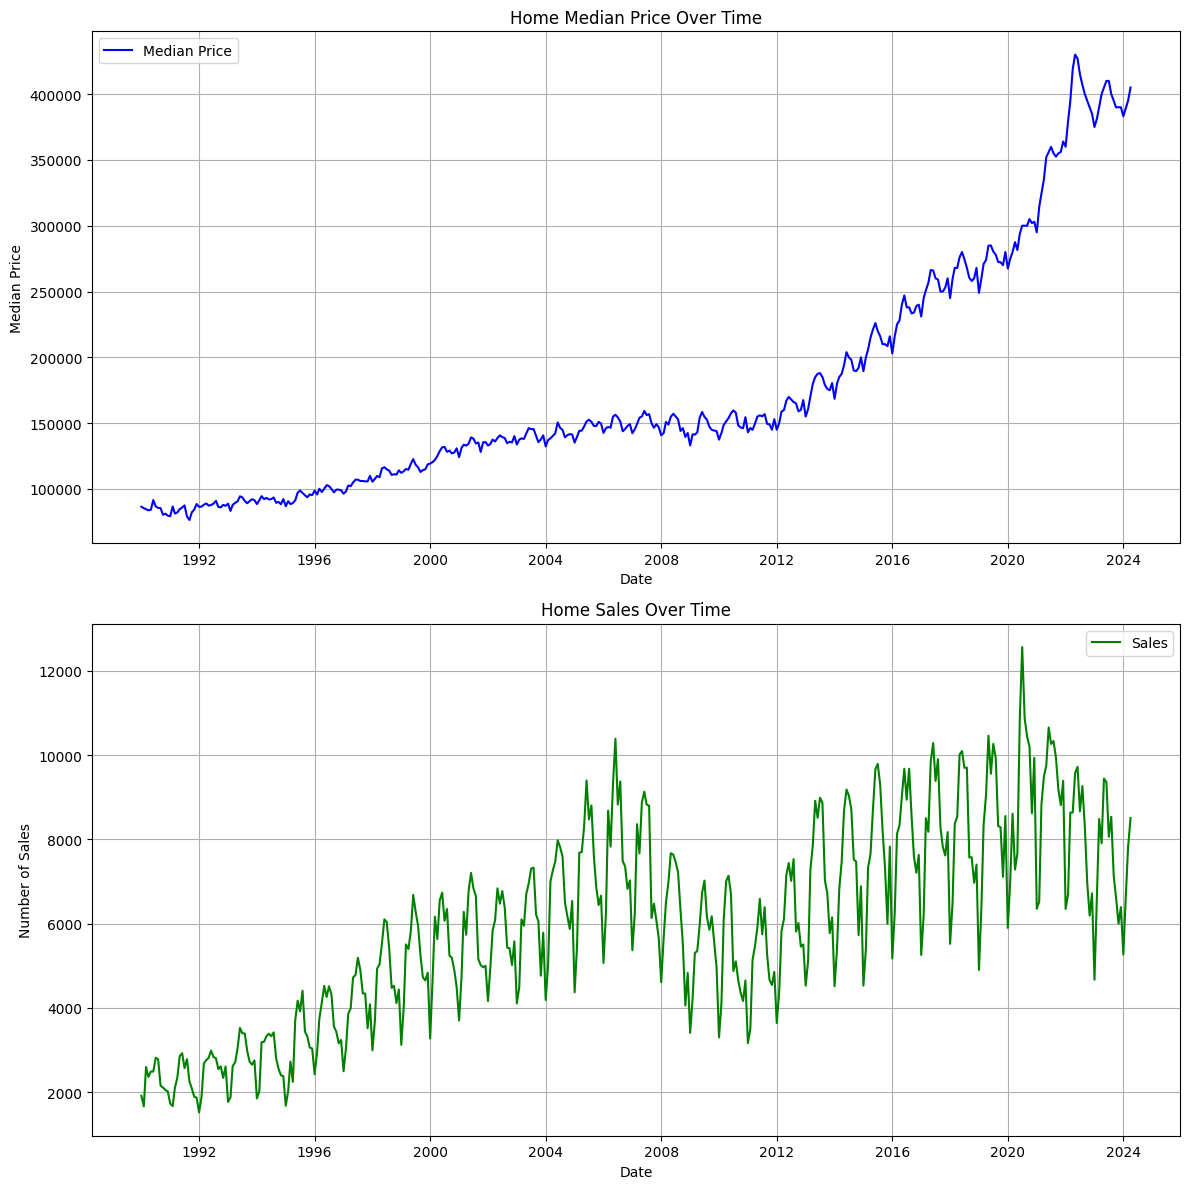

In [ ]:
#Series Check

import matplotlib.pyplot as plt
import numpy as np

#Set the figure size
plt.figure(figsize=(12, 12))

#Plot Median Price
plt.subplot(2, 1, 1)
plt.plot(PriceHold.index, PriceHold['Median Price'], label='Median Price', color='blue')
plt.title('Home Median Price Over Time')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.grid(True)
plt.legend()

#Plot Sales
plt.subplot(2, 1, 2)
plt.plot(PriceHold.index, PriceHold['Sales'], label='Sales', color='green')
plt.title('Home Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.legend()

#Adjust layout
plt.tight_layout()
plt.show()


#### Transformed Series

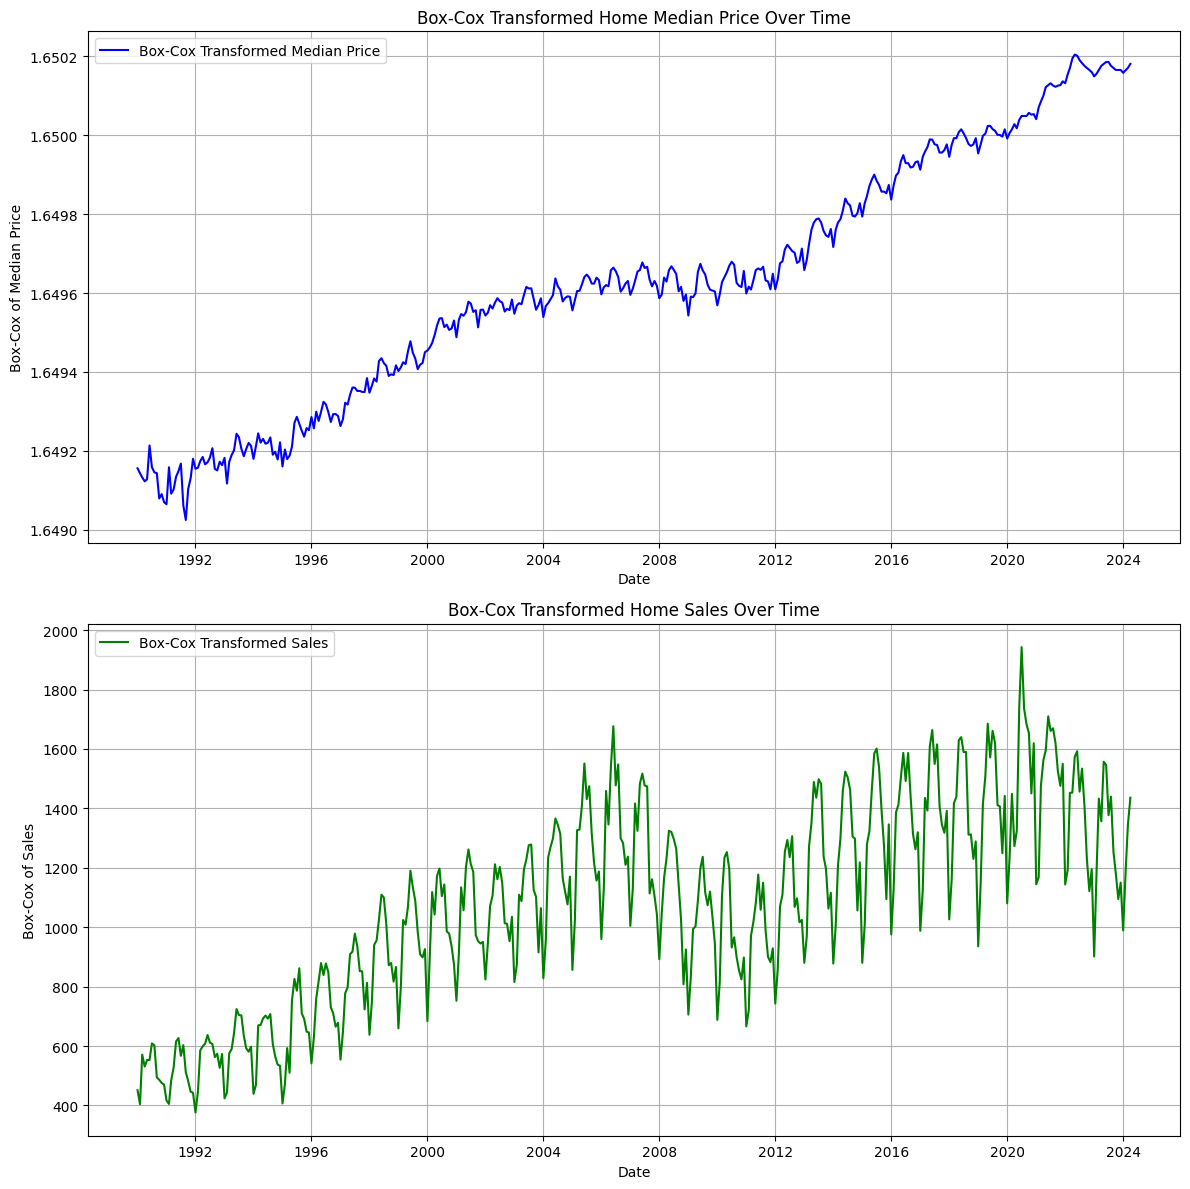

FEDFUNDS  MORTGAGE30US                  Market Name  Sales  \
DATE                                                                     
1990-01-01      8.23        9.8950  Dallas-Fort Worth-Arlington   1916   
1990-02-01      8.24       10.1975  Dallas-Fort Worth-Arlington   1663   
1990-03-01      8.28       10.2680  Dallas-Fort Worth-Arlington   2596   
1990-04-01      8.26       10.3700  Dallas-Fort Worth-Arlington   2362   
1990-05-01      8.18       10.4775  Dallas-Fort Worth-Arlington   2491   
...              ...           ...                          ...    ...   
2023-12-01      5.33        6.8150  Dallas-Fort Worth-Arlington   6391   
2024-01-01      5.33        6.6425  Dallas-Fort Worth-Arlington   5266   
2024-02-01      5.33        6.7760  Dallas-Fort Worth-Arlington   6644   
2024-03-01      5.33        6.8200  Dallas-Fort Worth-Arlington   7818   
2024-04-01      5.33        6.9925  Dallas-Fort Worth-Arlington   8507   

            Sales YoY%  Dollar Volume  Dollar Volume YoY%  Average Price  \
DATE                                                                       
1990-01-01      0.0000      201885088              0.0000         105368   
1990-02-01      0.0000      177856187              0.0000         106949   
1990-03-01      0.0000      271513044              0.0000         104589   
1990-04-01      0.0000      252715104              0.0000         106992   
1990-05-01      0.0000      279649624              0.0000         112264   
...                ...            ...                 ...            ...   
2023-12-01     -0.0485     3114822479              0.0169         487376   
2024-01-01      0.1276     2478483190              0.1618         470657   
2024-02-01     -0.0097     3150578414              0.0128         474199   
2024-03-01     -0.0785     3839266585             -0.0312         491080   
2024-04-01      0.0760     4292560868              0.1041         504591   

            Median Price  Active Listings EOM  Months Inventory  \
DATE                                                              
1990-01-01         86453                30166             15.74   
1990-02-01         85389                30656             17.13   
1990-03-01         84544                31481             15.29   
1990-04-01         83737                32050             15.02   
1990-05-01         84154                32106             14.56   
...                  ...                  ...               ...   
2023-12-01        390000                18775              2.52   
2024-01-01        383202                19173              2.56   
2024-02-01        389323                20340              2.72   
2024-03-01        395000                21947              2.95   
2024-04-01        405000                23587              3.15   

            boxcox_transform_price  boxcox_transform_sales  
DATE                                                        
1990-01-01                1.649156              451.068677  
1990-02-01                1.649143              404.029002  
1990-03-01                1.649133              571.186226  
1990-04-01                1.649123              530.756107  
1990-05-01                1.649128              553.150383  
...                            ...                     ...  
2023-12-01                1.650166             1149.829551  
2024-01-01                1.650158              989.367682  
2024-02-01                1.650165             1185.006637  
2024-03-01                1.650171             1344.519405  
2024-04-01                1.650181             1435.600427  

[412 rows x 13 columns]

In [ ]:

import numpy as np
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt

#Apply Box-Cox transformation and create new columns for both 'Median Price' and 'Sales'
PriceHold['boxcox_transform_price'], lam_price = boxcox(PriceHold['Median Price'].dropna())
PriceHold['boxcox_transform_sales'], lam_sales = boxcox(PriceHold['Sales'].dropna())

#Set the figure size
plt.figure(figsize=(12, 12))

#Plot the Box-Cox transformed Median Price data
plt.subplot(2, 1, 1)
plt.plot(PriceHold.index, PriceHold['boxcox_transform_price'], label='Box-Cox Transformed Median Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Box-Cox of Median Price')
plt.title('Box-Cox Transformed Home Median Price Over Time')
plt.grid(True)
plt.legend()

#Plot the Box-Cox transformed Sales data
plt.subplot(2, 1, 2)
plt.plot(PriceHold.index, PriceHold['boxcox_transform_sales'], label='Box-Cox Transformed Sales', color='green')
plt.xlabel('Date')
plt.ylabel('Box-Cox of Sales')
plt.title('Box-Cox Transformed Home Sales Over Time')
plt.grid(True)
plt.legend()

#Adjust layout
plt.tight_layout()
plt.show()

#Display the updated PriceHold DataFrame
PriceHold


#### ADF Test

In [ ]:

from statsmodels.tsa.stattools import adfuller
import numpy as np

# Apply Box-Cox transformation to Median Price and Sales
PriceHold['boxcox_transform_price'], lam_price = boxcox(PriceHold['Median Price'].dropna())
PriceHold['boxcox_transform_sales'], lam_sales = boxcox(PriceHold['Sales'].dropna())

# Non-seasonal differencing (first-order difference) on the Box-Cox transformed series for both Median Price and Sales
PriceHold['Non_Seasonal_Diff_Boxcox_Price'] = PriceHold['boxcox_transform_price'].diff()
PriceHold['Non_Seasonal_Diff_Boxcox_Sales'] = PriceHold['boxcox_transform_sales'].diff()

# Seasonal differencing (assuming monthly data with yearly seasonality, so lag=12) on the Box-Cox transformed series
PriceHold['Seasonal_Diff_Boxcox_Price'] = PriceHold['boxcox_transform_price'].diff(12)
PriceHold['Seasonal_Diff_Boxcox_Sales'] = PriceHold['boxcox_transform_sales'].diff(12)

# Dropping NaN values created by differencing for testing
non_seasonal_diff_boxcox_price = PriceHold['Non_Seasonal_Diff_Boxcox_Price'].dropna()
seasonal_diff_boxcox_price = PriceHold['Seasonal_Diff_Boxcox_Price'].dropna()

non_seasonal_diff_boxcox_sales = PriceHold['Non_Seasonal_Diff_Boxcox_Sales'].dropna()
seasonal_diff_boxcox_sales = PriceHold['Seasonal_Diff_Boxcox_Sales'].dropna()

# ADF Test for Non-Seasonal Differencing on Box-Cox Transformed Data for Median Price
adf_non_seasonal_boxcox_price = adfuller(non_seasonal_diff_boxcox_price)
print("ADF Test for Non-Seasonal Differenced Box-Cox Transformed Series - Median Price")
print(f"ADF Statistic: {adf_non_seasonal_boxcox_price[0]}")
print(f"p-value: {adf_non_seasonal_boxcox_price[1]}")
for key, value in adf_non_seasonal_boxcox_price[4].items():
    print(f"Critical Value {key}: {value}")
print("Stationary" if adf_non_seasonal_boxcox_price[1] < 0.05 else "Non-Stationary", "\n")

# ADF Test for Seasonal Differencing on Box-Cox Transformed Data for Median Price
adf_seasonal_boxcox_price = adfuller(seasonal_diff_boxcox_price)
print("ADF Test for Seasonally Differenced Box-Cox Transformed Series - Median Price (12-month differencing)")
print(f"ADF Statistic: {adf_seasonal_boxcox_price[0]}")
print(f"p-value: {adf_seasonal_boxcox_price[1]}")
for key, value in adf_seasonal_boxcox_price[4].items():
    print(f"Critical Value {key}: {value}")
print("Stationary" if adf_seasonal_boxcox_price[1] < 0.05 else "Non-Stationary", "\n")

# ADF Test for Non-Seasonal Differencing on Box-Cox Transformed Data for Sales
adf_non_seasonal_boxcox_sales = adfuller(non_seasonal_diff_boxcox_sales)
print("ADF Test for Non-Seasonal Differenced Box-Cox Transformed Series - Sales")
print(f"ADF Statistic: {adf_non_seasonal_boxcox_sales[0]}")
print(f"p-value: {adf_non_seasonal_boxcox_sales[1]}")
for key, value in adf_non_seasonal_boxcox_sales[4].items():
    print(f"Critical Value {key}: {value}")
print("Stationary" if adf_non_seasonal_boxcox_sales[1] < 0.05 else "Non-Stationary", "\n")

# ADF Test for Seasonal Differencing on Box-Cox Transformed Data for Sales
adf_seasonal_boxcox_sales = adfuller(seasonal_diff_boxcox_sales)
print("ADF Test for Seasonally Differenced Box-Cox Transformed Series - Sales (12-month differencing)")
print(f"ADF Statistic: {adf_seasonal_boxcox_sales[0]}")
print(f"p-value: {adf_seasonal_boxcox_sales[1]}")
for key, value in adf_seasonal_boxcox_sales[4].items():
    print(f"Critical Value {key}: {value}")
print("Stationary" if adf_seasonal_boxcox_sales[1] < 0.05 else "Non-Stationary")


ADF Test for Non-Seasonal Differenced Box-Cox Transformed Series - Median Price
ADF Statistic: -4.062474155959262
p-value: 0.0011164877995413047
Critical Value 1%: -3.447099431978147
Critical Value 5%: -2.8689225261604263
Critical Value 10%: -2.57070269105012
Stationary 

ADF Test for Seasonally Differenced Box-Cox Transformed Series - Median Price (12-month differencing)
ADF Statistic: -2.4714395073624744
p-value: 0.12257893275713144
Critical Value 1%: -3.4474946672686824
Critical Value 5%: -2.8690962436986855
Critical Value 10%: -2.570795299750434
Non-Stationary 

ADF Test for Non-Seasonal Differenced Box-Cox Transformed Series - Sales
ADF Statistic: -4.323694931474936
p-value: 0.00040406433752354464
Critical Value 1%: -3.447014064067954
Critical Value 5%: -2.8688850015516016
Critical Value 10%: -2.5706826870693797
Stationary 

ADF Test for Seasonally Differenced Box-Cox Transformed Series - Sales (12-month differencing)
ADF Statistic: -3.414382944222268
p-value: 0.010478221532278464

#### ACF and PACF charts

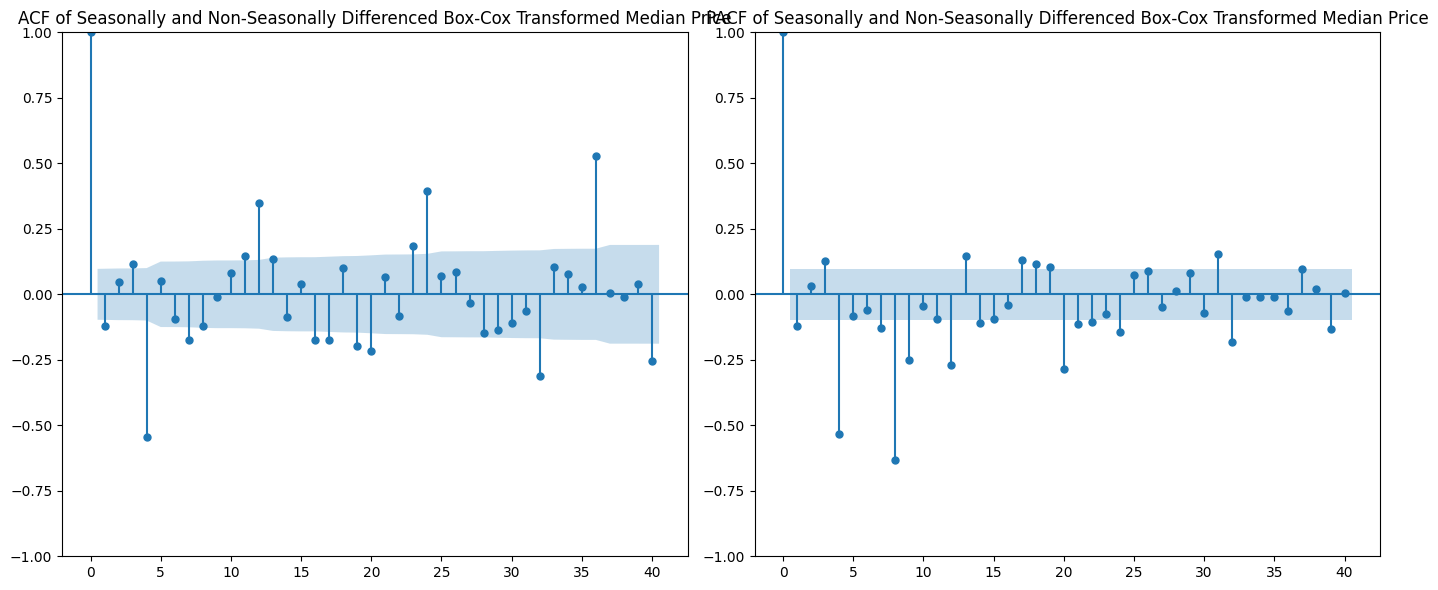

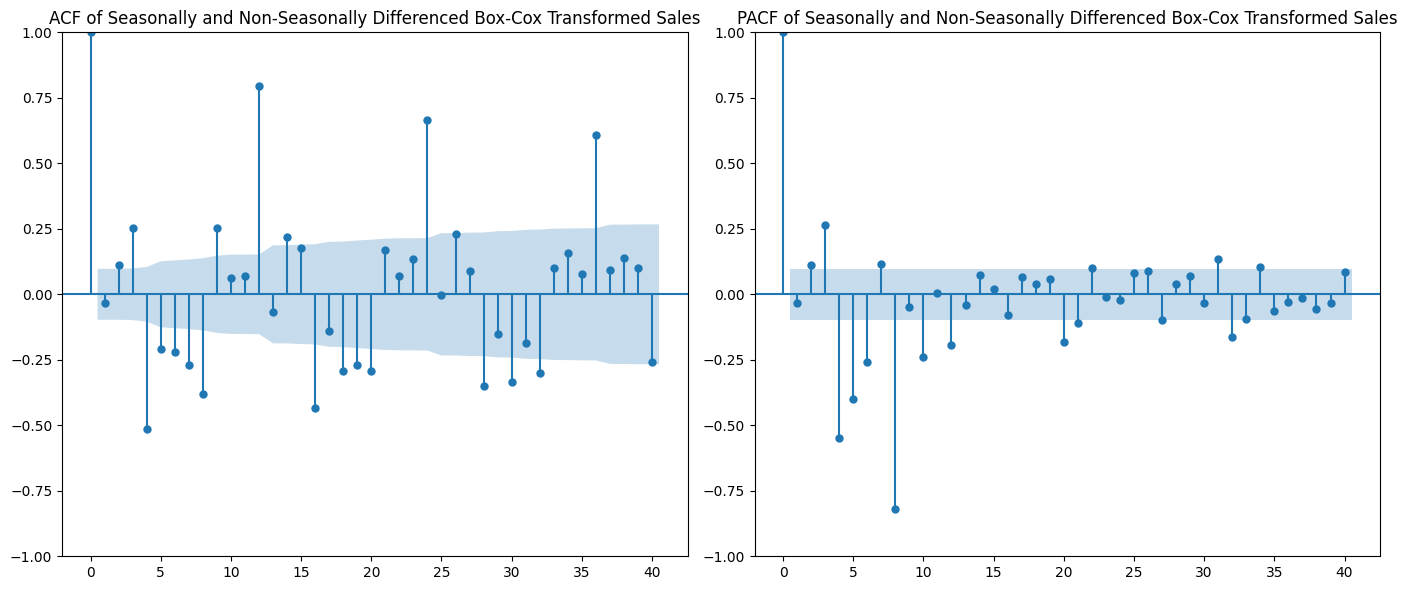

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import boxcox

# Apply Box-Cox transformation to Median Price and Sales
PriceHold['boxcox_transform_price'], lam_price = boxcox(PriceHold['Median Price'].dropna())
PriceHold['boxcox_transform_sales'], lam_sales = boxcox(PriceHold['Sales'].dropna())

# Box-Cox transform and differencing for Median Price
data_boxcox_price = PriceHold['boxcox_transform_price']
data_diff_boxcox_price = data_boxcox_price.diff(4).dropna()  # Seasonal differencing with lag 4
data_diff_boxcox_price = data_diff_boxcox_price.diff().dropna()  # Additional non-seasonal differencing

# Box-Cox transform and differencing for Sales
data_boxcox_sales = PriceHold['boxcox_transform_sales']
data_diff_boxcox_sales = data_boxcox_sales.diff(4).dropna()  # Seasonal differencing with lag 4
data_diff_boxcox_sales = data_diff_boxcox_sales.diff().dropna()  # Additional non-seasonal differencing

# Plot ACF and PACF for the seasonally and non-seasonally differenced Box-Cox transformed data for Median Price
plt.figure(figsize=(14, 6))

# ACF plot for Median Price
plt.subplot(1, 2, 1)
plot_acf(data_diff_boxcox_price, lags=40, ax=plt.gca())
plt.title("ACF of Seasonally and Non-Seasonally Differenced Box-Cox Transformed Median Price")

# PACF plot for Median Price
plt.subplot(1, 2, 2)
plot_pacf(data_diff_boxcox_price, lags=40, ax=plt.gca())
plt.title("PACF of Seasonally and Non-Seasonally Differenced Box-Cox Transformed Median Price")

plt.tight_layout()
plt.show()

# Plot ACF and PACF for the seasonally and non-seasonally differenced Box-Cox transformed data for Sales
plt.figure(figsize=(14, 6))

# ACF plot for Sales
plt.subplot(1, 2, 1)
plot_acf(data_diff_boxcox_sales, lags=40, ax=plt.gca())
plt.title("ACF of Seasonally and Non-Seasonally Differenced Box-Cox Transformed Sales")

# PACF plot for Sales
plt.subplot(1, 2, 2)
plot_pacf(data_diff_boxcox_sales, lags=40, ax=plt.gca())
plt.title("PACF of Seasonally and Non-Seasonally Differenced Box-Cox Transformed Sales")

plt.tight_layout()
plt.show()


#### Forecast on Holdout Period

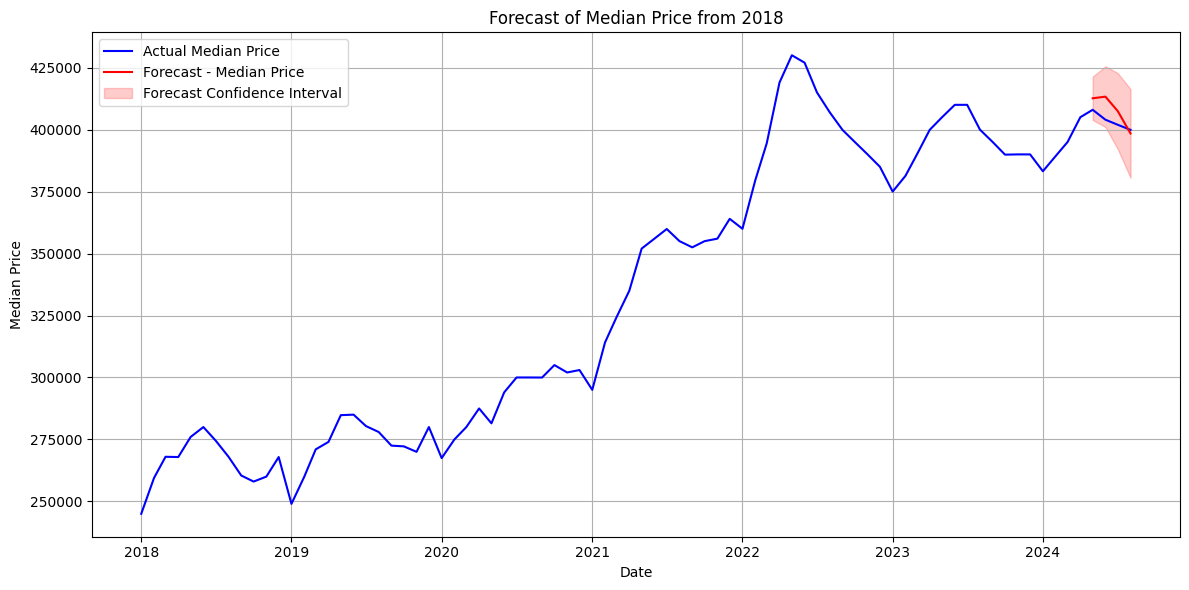

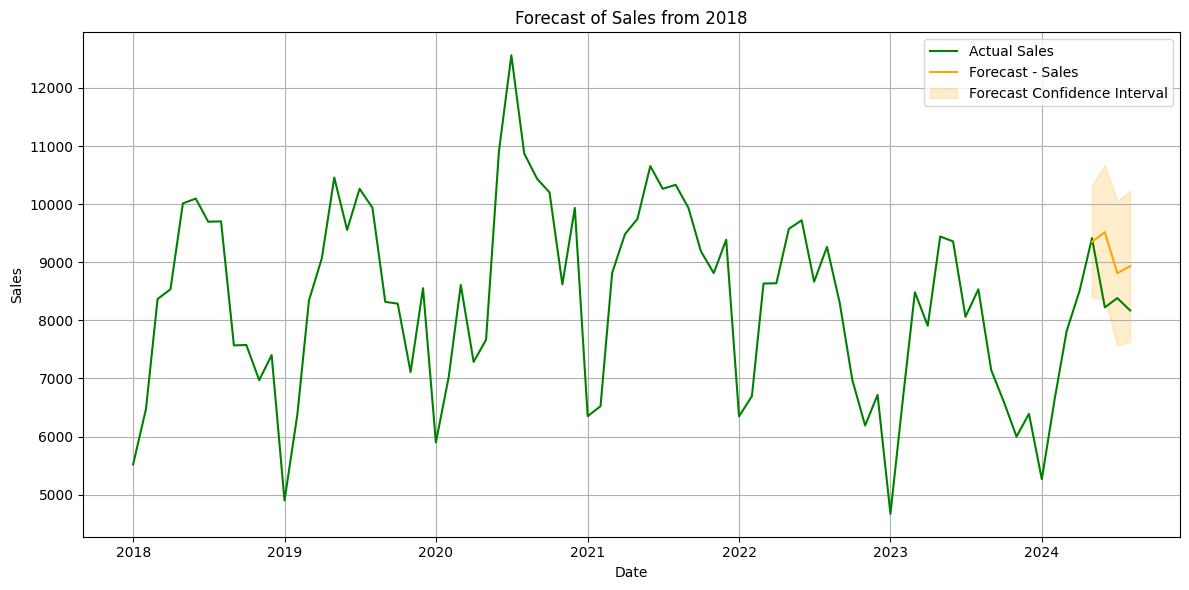

Forecasted Median Price:
2024-05-01    412644.750794
2024-06-01    413299.996952
2024-07-01    407462.760984
2024-08-01    398435.633645
Freq: MS, Name: predicted_mean, dtype: float64

Forecasted Sales:
2024-05-01    9351.159976
2024-06-01    9518.147785
2024-07-01    8811.400324
2024-08-01    8933.113898
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model for Median Price
sarima_model_price = SARIMAX(PriceHold['Median Price'],
                             order=(0, 1, 2),
                             seasonal_order=(1, 1, 0, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)

sarima_results_price = sarima_model_price.fit(disp=False)

# Forecast for the holdout period (next 4 observations)
forecast_price = sarima_results_price.get_forecast(steps=4)
forecast_price_ci = forecast_price.conf_int()

# Fit SARIMA model for Sales
sarima_model_sales = SARIMAX(PriceHold['Sales'],
                             order=(1, 1, 1),
                             seasonal_order=(1, 1, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)

sarima_results_sales = sarima_model_sales.fit(disp=False)

# Forecast for the holdout period (next 4 observations)
forecast_sales = sarima_results_sales.get_forecast(steps=4)
forecast_sales_ci = forecast_sales.conf_int()

# Filter data to show from 2018 onwards
start_date = '2018-01-01'
df_filtered = df[df.index >= start_date]

# Plot the forecast for Median Price from 2018
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Median Price'], label='Actual Median Price', color='blue')
#plt.plot(PriceHold.index[-4:], PriceHold['Median Price'][-4:], label='Actual - Median Price (Holdout)', color='blue')
#plt.plot(PriceHold.loc['2018':].index, PriceHold.loc['2018':]['Median Price'], label='Observed - Median Price', color='blue')
#plt.plot(PriceHold.index[-4:], PriceHold['Median Price'][-4:], label='Actual - Median Price (Holdout)', color='blue')
plt.plot(forecast_price.predicted_mean.index, forecast_price.predicted_mean, label='Forecast - Median Price', color='red')
plt.fill_between(forecast_price_ci.index,
                 forecast_price_ci.iloc[:, 0],
                 forecast_price_ci.iloc[:, 1], color='red', alpha=0.2, label='Forecast Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Forecast of Median Price from 2018')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the forecast for Sales from 2018
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Sales'], label='Actual Sales', color='green')
#plt.plot(PriceHold.index[-4:], PriceHold['Sales'][-4:], label='Actual - Sales (Holdout)', color='green')
#plt.plot(PriceHold.loc['2018':].index, PriceHold.loc['2018':]['Sales'], label='Observed - Sales', color='green')
#plt.plot(PriceHold.index[-4:], PriceHold['Sales'][-4:], label='Actual - Sales (Holdout)', color='green')
plt.plot(forecast_sales.predicted_mean.index, forecast_sales.predicted_mean, label='Forecast - Sales', color='orange')
plt.fill_between(forecast_sales_ci.index,
                 forecast_sales_ci.iloc[:, 0],
                 forecast_sales_ci.iloc[:, 1], color='orange', alpha=0.2, label='Forecast Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecast of Sales from 2018')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Display forecasted values for both Median Price and Sales
forecasted_median_price = forecast_price.predicted_mean
forecasted_sales = forecast_sales.predicted_mean
print("Forecasted Median Price:")
print(forecasted_median_price)
print("\nForecasted Sales:")
print(forecasted_sales)


In [ ]:
#RMSE for trained models

from sklearn.metrics import mean_squared_error

# Calculate MSE and RMSE for Median Price
actual_price_holdout = PriceHold['Median Price'][-4:]
mse_price = mean_squared_error(actual_price_holdout, forecasted_median_price)
rmse_price = np.sqrt(mse_price)
print("\nMSE for Median Price:", mse_price)
print("RMSE for Median Price:", rmse_price)

# Calculate MSE and RMSE for Sales
actual_sales_holdout = PriceHold['Sales'][-4:]
mse_sales = mean_squared_error(actual_sales_holdout, forecasted_sales)
rmse_sales = np.sqrt(mse_sales)
print("\nMSE for Sales:", mse_sales)
print("RMSE for Sales:", rmse_sales)



MSE for Median Price: 410045818.5315508
RMSE for Median Price: 20249.588107701125

MSE for Sales: 6529418.694526104
RMSE for Sales: 2555.272724099348


#### Forecast into future

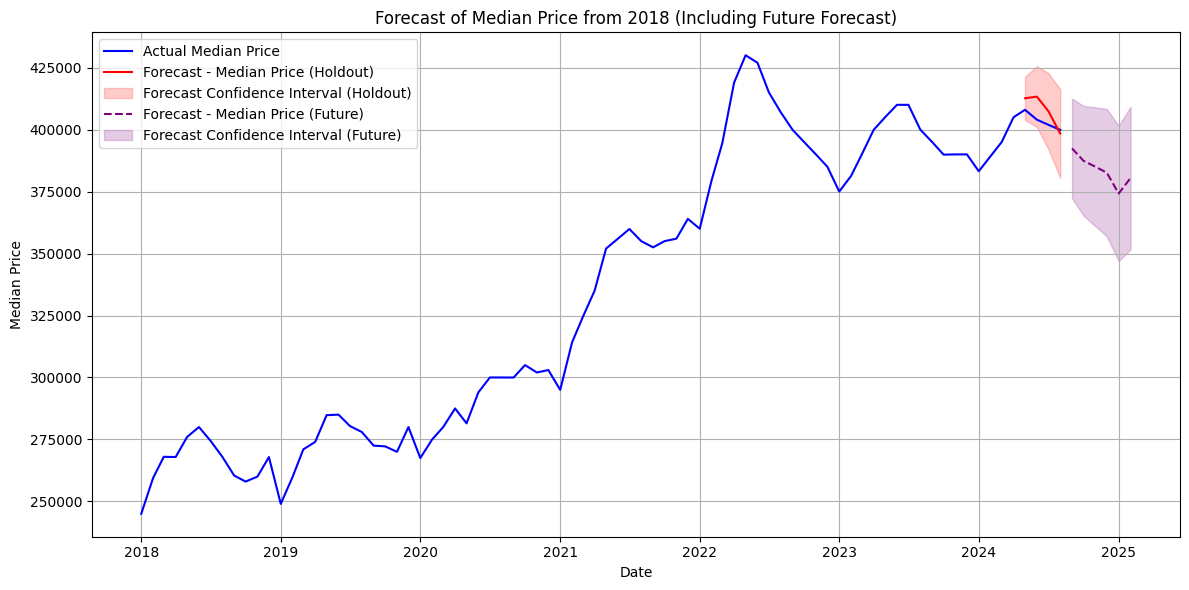

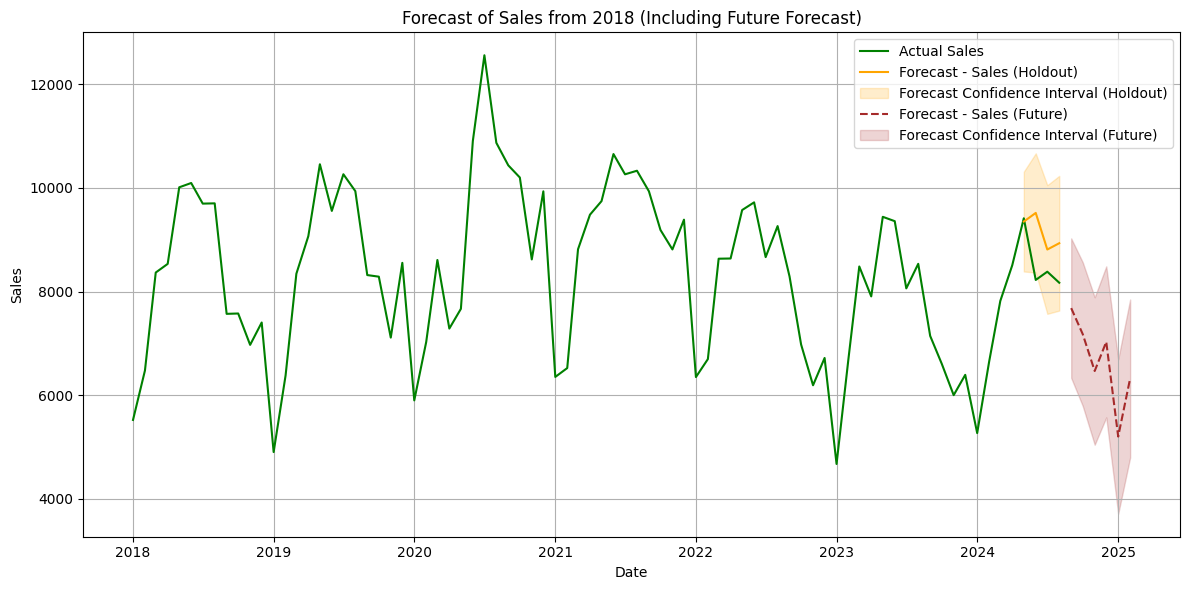

Forecasted Median Price (including future 6 months):
2024-05-01    412644.750794
2024-06-01    413299.996952
2024-07-01    407462.760984
2024-08-01    398435.633645
2024-09-01    392414.117350
2024-10-01    387411.404617
2024-11-01    385030.579330
2024-12-01    382598.397676
2025-01-01    374242.828545
2025-02-01    380467.925920
Freq: MS, Name: predicted_mean, dtype: float64

Forecasted Sales (including future 6 months):
2024-05-01    9351.159976
2024-06-01    9518.147785
2024-07-01    8811.400324
2024-08-01    8933.113898
2024-09-01    7679.592428
2024-10-01    7176.616693
2024-11-01    6465.287218
2024-12-01    7028.042372
2025-01-01    5199.481887
2025-02-01    6321.460734
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Forecast for the additional 6 months (after holdout period)
additional_steps = 6

# Forecast for Median Price for additional period
forecast_price_future = sarima_results_price.get_forecast(steps=4 + additional_steps)
forecast_price_ci_future = forecast_price_future.conf_int()

# Forecast for Sales for additional period
forecast_sales_future = sarima_results_sales.get_forecast(steps=4 + additional_steps)
forecast_sales_ci_future = forecast_sales_future.conf_int()

# Plot the forecast for Median Price from 2018, including the 6-month future forecast
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Median Price'], label='Actual Median Price', color='blue')
plt.plot(forecast_price.predicted_mean.index, forecast_price.predicted_mean, label='Forecast - Median Price (Holdout)', color='red')
plt.fill_between(forecast_price_ci.index,
                 forecast_price_ci.iloc[:, 0],
                 forecast_price_ci.iloc[:, 1], color='red', alpha=0.2, label='Forecast Confidence Interval (Holdout)')
plt.plot(forecast_price_future.predicted_mean.index[-additional_steps:], forecast_price_future.predicted_mean[-additional_steps:],
         label='Forecast - Median Price (Future)', color='purple', linestyle='--')
plt.fill_between(forecast_price_ci_future.index[-additional_steps:],
                 forecast_price_ci_future.iloc[-additional_steps:, 0],
                 forecast_price_ci_future.iloc[-additional_steps:, 1], color='purple', alpha=0.2, label='Forecast Confidence Interval (Future)')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Forecast of Median Price from 2018 (Including Future Forecast)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the forecast for Sales from 2018, including the 6-month future forecast
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Sales'], label='Actual Sales', color='green')
plt.plot(forecast_sales.predicted_mean.index, forecast_sales.predicted_mean, label='Forecast - Sales (Holdout)', color='orange')
plt.fill_between(forecast_sales_ci.index,
                 forecast_sales_ci.iloc[:, 0],
                 forecast_sales_ci.iloc[:, 1], color='orange', alpha=0.2, label='Forecast Confidence Interval (Holdout)')
plt.plot(forecast_sales_future.predicted_mean.index[-additional_steps:], forecast_sales_future.predicted_mean[-additional_steps:],
         label='Forecast - Sales (Future)', color='brown', linestyle='--')
plt.fill_between(forecast_sales_ci_future.index[-additional_steps:],
                 forecast_sales_ci_future.iloc[-additional_steps:, 0],
                 forecast_sales_ci_future.iloc[-additional_steps:, 1], color='brown', alpha=0.2, label='Forecast Confidence Interval (Future)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecast of Sales from 2018 (Including Future Forecast)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display forecasted values for both Median Price and Sales, including the future forecast
print("Forecasted Median Price (including future 6 months):")
print(forecast_price_future.predicted_mean)

print("\nForecasted Sales (including future 6 months):")
print(forecast_sales_future.predicted_mean)


# SARIMAX | EXOGENOUS

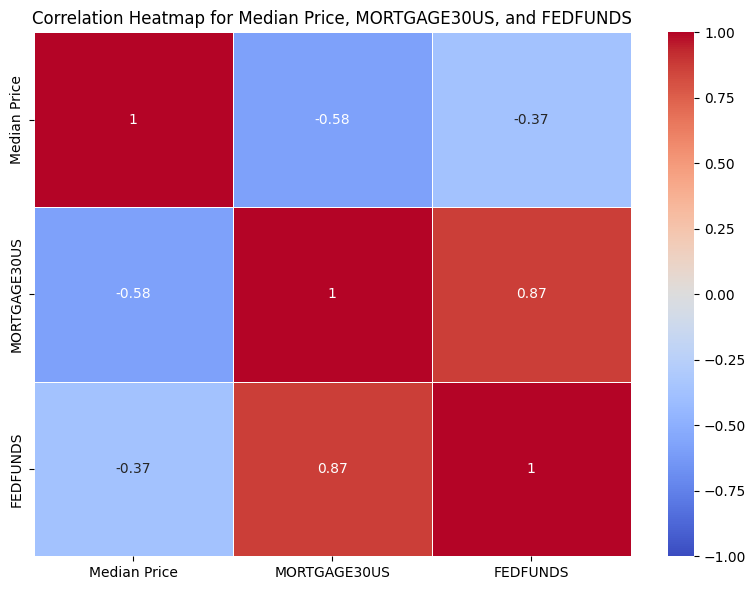

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the specified columns
correlation_matrix = PriceHold[['Median Price', 'MORTGAGE30US', 'FEDFUNDS']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap for Median Price, MORTGAGE30US, and FEDFUNDS')

# Display the plot
plt.tight_layout()
plt.show()


#### Forecast on Holdout Period

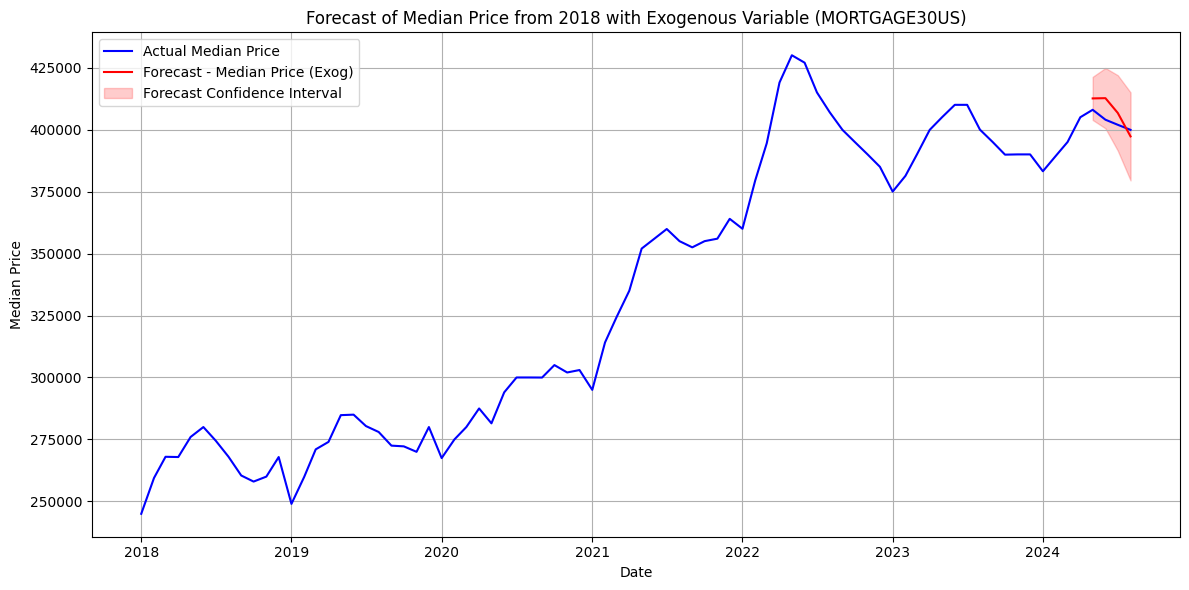

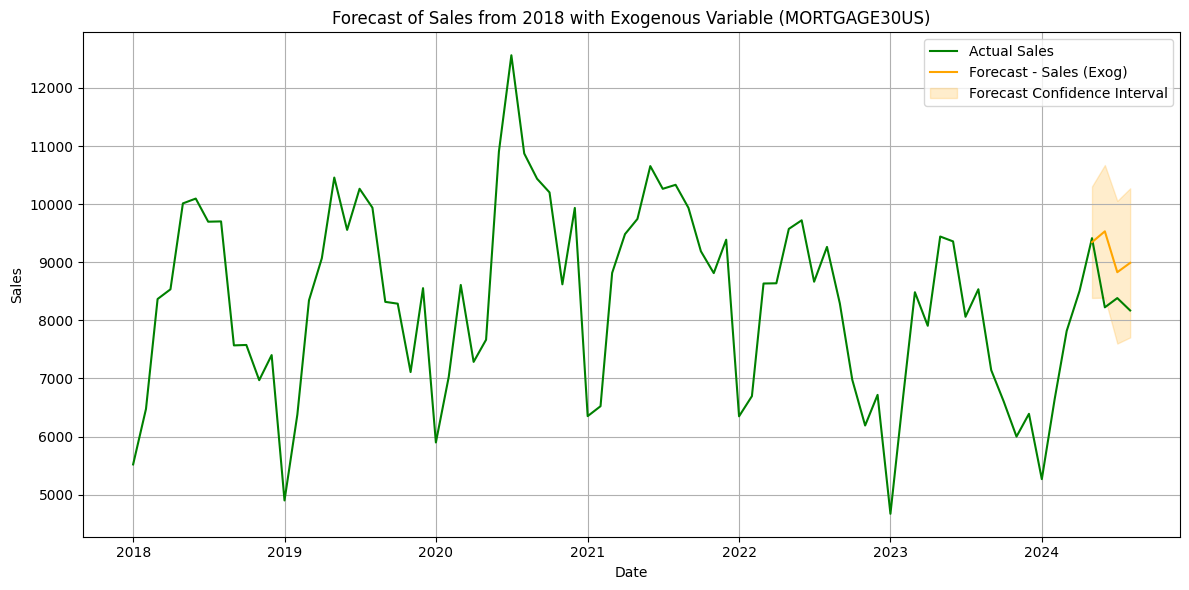

Forecasted Median Price with Exogenous Variable (MORTGAGE30US):
2024-05-01    412589.665482
2024-06-01    412692.074449
2024-07-01    406729.609629
2024-08-01    397262.495326
Freq: MS, Name: predicted_mean, dtype: float64

Forecasted Sales with Exogenous Variable (MORTGAGE30US):
2024-05-01    9345.419201
2024-06-01    9532.119294
2024-07-01    8828.595287
2024-08-01    8989.193180
Freq: MS, Name: predicted_mean, dtype: float64

MSE for Median Price with Exogenous Variable (MORTGAGE30US): 401800310.9314342
RMSE for Median Price with Exogenous Variable (MORTGAGE30US): 20044.957244440164

MSE for Sales with Exogenous Variable (MORTGAGE30US): 6559176.793827076
RMSE for Sales with Exogenous Variable (MORTGAGE30US): 2561.088985925143


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Fit SARIMA model for Median Price with exogenous variable (MORTGAGE30US)
exog_variables = df[['MORTGAGE30US']]
sarima_model_price_exog = SARIMAX(PriceHold['Median Price'],
                                  exog=exog_variables.loc[PriceHold.index],
                                  order=(0, 1, 2),
                                  seasonal_order=(1, 1, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

sarima_results_price_exog = sarima_model_price_exog.fit(disp=False)

# Forecast for the holdout period (next 4 observations) with exogenous variable
exog_forecast_price = exog_variables.loc[forecast_price.predicted_mean.index]
forecast_price_exog = sarima_results_price_exog.get_forecast(steps=4, exog=exog_forecast_price)
forecast_price_exog_ci = forecast_price_exog.conf_int()

# Fit SARIMA model for Sales with exogenous variable (MORTGAGE30US)
sarima_model_sales_exog = SARIMAX(PriceHold['Sales'],
                                  exog=exog_variables.loc[PriceHold.index],
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

sarima_results_sales_exog = sarima_model_sales_exog.fit(disp=False)

# Forecast for the holdout period (next 4 observations) with exogenous variable
exog_forecast_sales = exog_variables.loc[forecast_sales.predicted_mean.index]
forecast_sales_exog = sarima_results_sales_exog.get_forecast(steps=4, exog=exog_forecast_sales)
forecast_sales_exog_ci = forecast_sales_exog.conf_int()

# Plot the forecast for Median Price from 2018 with exogenous variable
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Median Price'], label='Actual Median Price', color='blue')
plt.plot(forecast_price_exog.predicted_mean.index, forecast_price_exog.predicted_mean, label='Forecast - Median Price (Exog)', color='red')
plt.fill_between(forecast_price_exog_ci.index,
                 forecast_price_exog_ci.iloc[:, 0],
                 forecast_price_exog_ci.iloc[:, 1], color='red', alpha=0.2, label='Forecast Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Forecast of Median Price from 2018 with Exogenous Variable (MORTGAGE30US)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the forecast for Sales from 2018 with exogenous variable
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Sales'], label='Actual Sales', color='green')
plt.plot(forecast_sales_exog.predicted_mean.index, forecast_sales_exog.predicted_mean, label='Forecast - Sales (Exog)', color='orange')
plt.fill_between(forecast_sales_exog_ci.index,
                 forecast_sales_exog_ci.iloc[:, 0],
                 forecast_sales_exog_ci.iloc[:, 1], color='orange', alpha=0.2, label='Forecast Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Forecast of Sales from 2018 with Exogenous Variable (MORTGAGE30US)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display forecasted values for both Median Price and Sales with exogenous variable
forecasted_median_price_exog = forecast_price_exog.predicted_mean
forecasted_sales_exog = forecast_sales_exog.predicted_mean
print("Forecasted Median Price with Exogenous Variable (MORTGAGE30US):")
print(forecasted_median_price_exog)
print("\nForecasted Sales with Exogenous Variable (MORTGAGE30US):")
print(forecasted_sales_exog)

# Calculate MSE and RMSE for Median Price with exogenous variable
mse_price_exog = mean_squared_error(actual_price_holdout, forecasted_median_price_exog)
rmse_price_exog = np.sqrt(mse_price_exog)
print("\nMSE for Median Price with Exogenous Variable (MORTGAGE30US):", mse_price_exog)
print("RMSE for Median Price with Exogenous Variable (MORTGAGE30US):", rmse_price_exog)

# Calculate MSE and RMSE for Sales with exogenous variable
mse_sales_exog = mean_squared_error(actual_sales_holdout, forecasted_sales_exog)
rmse_sales_exog = np.sqrt(mse_sales_exog)
print("\nMSE for Sales with Exogenous Variable (MORTGAGE30US):", mse_sales_exog)
print("RMSE for Sales with Exogenous Variable (MORTGAGE30US):", rmse_sales_exog)


# LSTM

### **Median Price**

In [ ]:
import pandas as pd

# Load the data
file_path ="/content/drive/MyDrive/Colab Notebooks/Data Science Colab/Housing_Activity_Median_Price.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Display basic information about the dataset
print(data.head())
print(data.info())

data = data.sort_values(by='Date')


        Date  Median Price  FEDFUNDS  MORTGAGE30US
0 1990-01-01         86453      8.23        9.8950
1 1990-02-01         85389      8.24       10.1975
2 1990-03-01         84544      8.28       10.2680
3 1990-04-01         83737      8.26       10.3700
4 1990-05-01         84154      8.18       10.4775
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          416 non-null    datetime64[ns]
 1   Median Price  416 non-null    int64         
 2   FEDFUNDS      416 non-null    float64       
 3   MORTGAGE30US  416 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 13.1 KB
None


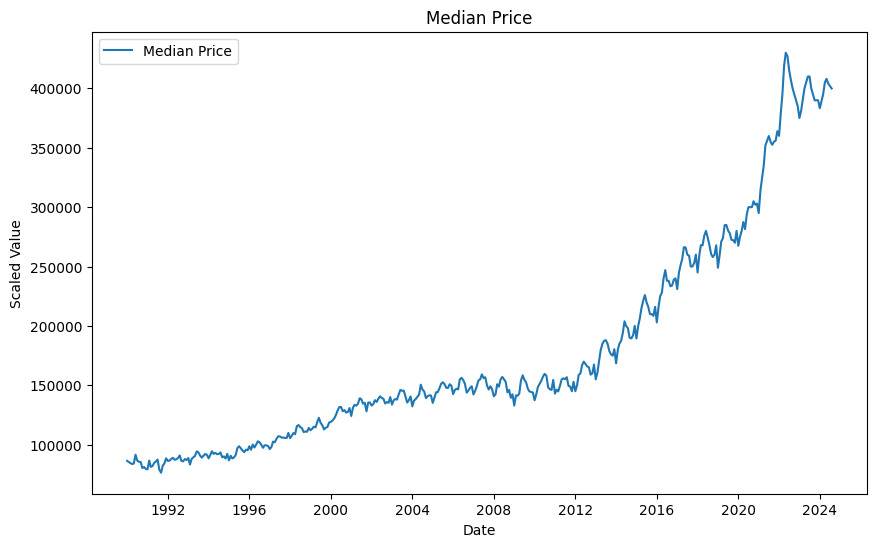

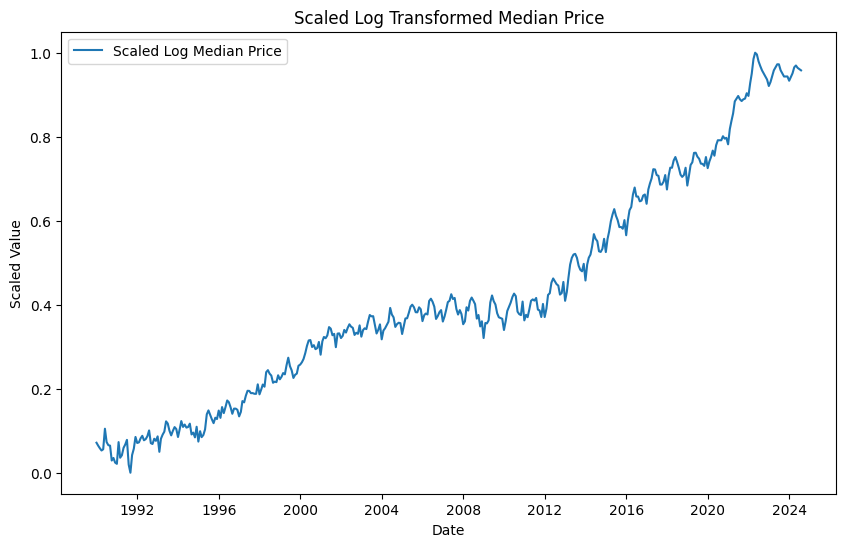

['scaler.pkl']

In [ ]:
#Lets preprocess


# Visualize before scaling data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Median Price'], label='Median Price')
plt.title('Median Price')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()


import numpy as np
# Log transform the target variable
data['log_Median_Price'] = np.log(data['Median Price'])

# Normalize the target variable
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_log_Median_Price'] = scaler.fit_transform(data[['log_Median_Price']])

# Visualize the scaled data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['scaled_log_Median_Price'], label='Scaled Log Median Price')
plt.title('Scaled Log Transformed Median Price')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

# Save the scaler for later use (for inverse transformation)
import joblib
joblib.dump(scaler, 'scaler.pkl')


In [ ]:
#Prepare Sequences for LSTM


def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i])  # Input: last `sequence_length` values
        y.append(data[i])  # Output: next value
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 12

# Generate sequences
sequences = data['scaled_log_Median_Price'].values
x, y = create_sequences(sequences, sequence_length)

print(f"x shape: {x.shape}, y shape: {y.shape}")


x shape: (404, 12), y shape: (404,)


In [ ]:
#Split

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


x_train shape: (323, 12), x_test shape: (81, 12)
y_train shape: (323,), y_test shape: (81,)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0733 - val_loss: 0.0021
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0157 - val_loss: 0.0584
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0072 - val_loss: 0.0077
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0035 - val_loss: 0.0097
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0025 - val_loss: 9.6871e-04
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss:

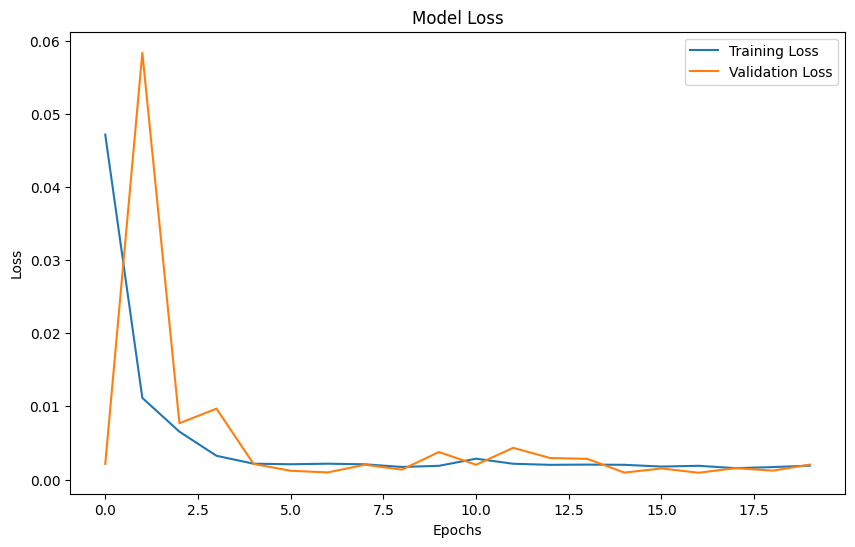

In [ ]:
#Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#Early stopping monitors validation loss and stops training if it doesn’t improve for 10 epochs.


# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Forecast

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
Actual vs. Predicted Values:
      Actual  Predicted
0  12.468437  12.471379
1  12.409013  12.475796
2  12.466319  12.479351
3  12.498742  12.480376
4  12.498369  12.482303


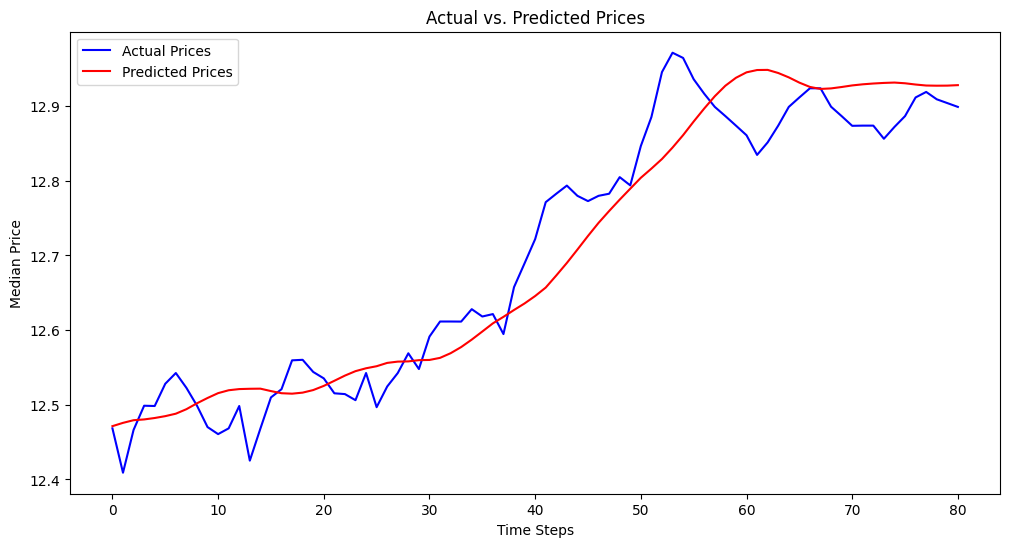

Root Mean Squared Error (RMSE): 0.052628198596560836


In [ ]:
#check the fit on Test data

from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure `scaler` is available from training
# It should have been fitted earlier like this:
# scaler = MinMaxScaler(feature_range=(0, 1))
# y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))


# Make predictions on the test data
predictions = model.predict(x_test)

# Rescale the predictions and the actual values back to their original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test_rescaled.flatten(),
    'Predicted': predictions_rescaled.flatten()
})

# Display the first few rows of the comparison DataFrame
print("Actual vs. Predicted Values:")
print(comparison_df.head())

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(range(len(predictions_rescaled)), predictions_rescaled, label='Predicted Prices', color='red')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Median Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))

print(f"Root Mean Squared Error (RMSE): {rmse}")


#### Forecast into future

Last sequence shape: (1, 12, 1)
Prediction step 1, input shape: (1, 12, 1)
Updated last_sequence shape: (1, 12, 1)
Prediction step 2, input shape: (1, 12, 1)
Updated last_sequence shape: (1, 12, 1)
Prediction step 3, input shape: (1, 12, 1)
Updated last_sequence shape: (1, 12, 1)
Prediction step 4, input shape: (1, 12, 1)
Updated last_sequence shape: (1, 12, 1)
Prediction step 5, input shape: (1, 12, 1)
Updated last_sequence shape: (1, 12, 1)
Prediction step 6, input shape: (1, 12, 1)
Updated last_sequence shape: (1, 12, 1)


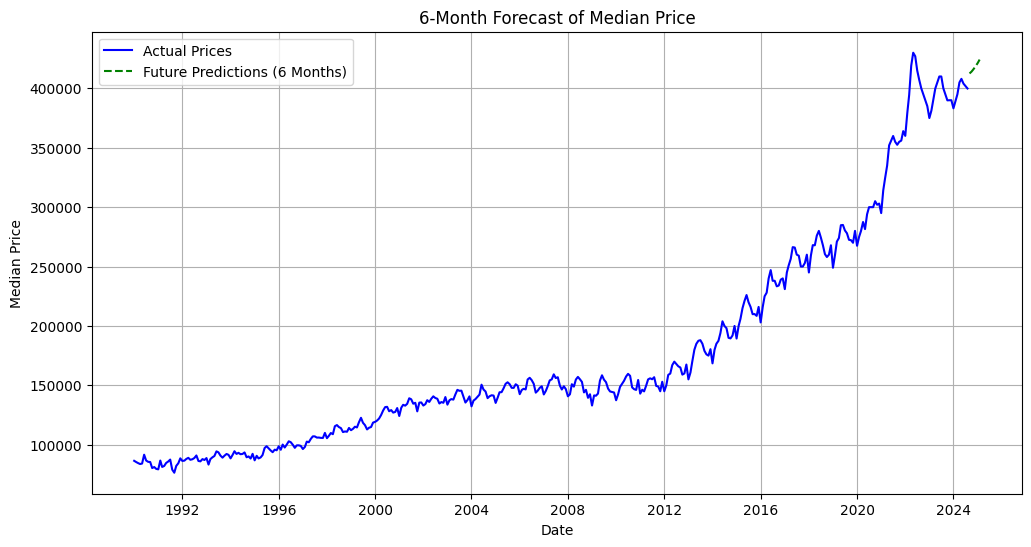

Future Predictions for the Next 6 Months:
            Predicted Median Price
Date                              
2024-09-01            412528.00000
2024-10-01            414069.90625
2024-11-01            416209.84375
2024-12-01            418581.03125
2025-01-01            421148.90625
2025-02-01            424229.43750


In [ ]:

# Prepare the last sequence for prediction
sequence_length = 12
last_sequence = data['scaled_log_Median_Price'].values[-sequence_length:]  # Take the last 12 steps
last_sequence = last_sequence.reshape(1, sequence_length, 1)  # Reshape for LSTM input
print(f"Last sequence shape: {last_sequence.shape}")


# Rebuild the model explicitly for prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model for prediction
inference_model = Sequential()
inference_model.add(LSTM(units=50, return_sequences=True, input_shape=(12, 1)))
inference_model.add(Dropout(0.2))
inference_model.add(LSTM(units=50))
inference_model.add(Dropout(0.2))
inference_model.add(Dense(units=1))

# Compile the inference model
inference_model.compile(optimizer='adam', loss='mean_squared_error')

# Load the weights from the trained model
inference_model.set_weights(model.get_weights())

# Generate predictions
#rolling values

future_predictions = []  # Store future predictions
for step in range(6):
    print(f"Prediction step {step + 1}, input shape: {last_sequence.shape}")

    # Predict the next value
    next_prediction = inference_model.predict(last_sequence, verbose=0)
    future_predictions.append(next_prediction[0, 0])  # Store the predicted value

    # Update the sequence for the next prediction
    new_sequence = np.append(last_sequence[0, 1:, :], [[next_prediction[0, 0]]], axis=0)
    last_sequence = new_sequence.reshape(1, 12, 1)  # Reshape back for LSTM
    print(f"Updated last_sequence shape: {last_sequence.shape}")

# Rescale the predictions back to the original scale
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_predictions_actual = np.exp(future_predictions_rescaled)  # Reverse log transformation

# Generate future dates
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=7, freq='MS')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Median Price': future_predictions_actual.flatten()
})
future_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the historical actual data
plt.plot(data['Date'], data['Median Price'], label='Actual Prices', color='blue')

# Plot the future predictions
plt.plot(future_df.index, future_df['Predicted Median Price'], label='Future Predictions (6 Months)', color='green', linestyle='--')

# Add plot details
plt.title('6-Month Forecast of Median Price')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the future predictions
print("Future Predictions for the Next 6 Months:")
print(future_df)

### **Sales**

In [ ]:
# Load the data
file_path ="/content/drive/MyDrive/Colab Notebooks/Data Science Colab/Housing_Activity_Sales.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Display basic information about the dataset
print(data.head())
print(data.info())

# Ensure that 'Date' is properly formatted
data = data.sort_values(by='Date')


        Date  Sales  FEDFUNDS  MORTGAGE30US
0 1990-01-01   1916      8.23        9.8950
1 1990-02-01   1663      8.24       10.1975
2 1990-03-01   2596      8.28       10.2680
3 1990-04-01   2362      8.26       10.3700
4 1990-05-01   2491      8.18       10.4775
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          416 non-null    datetime64[ns]
 1   Sales         416 non-null    int64         
 2   FEDFUNDS      416 non-null    float64       
 3   MORTGAGE30US  416 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 13.1 KB
None


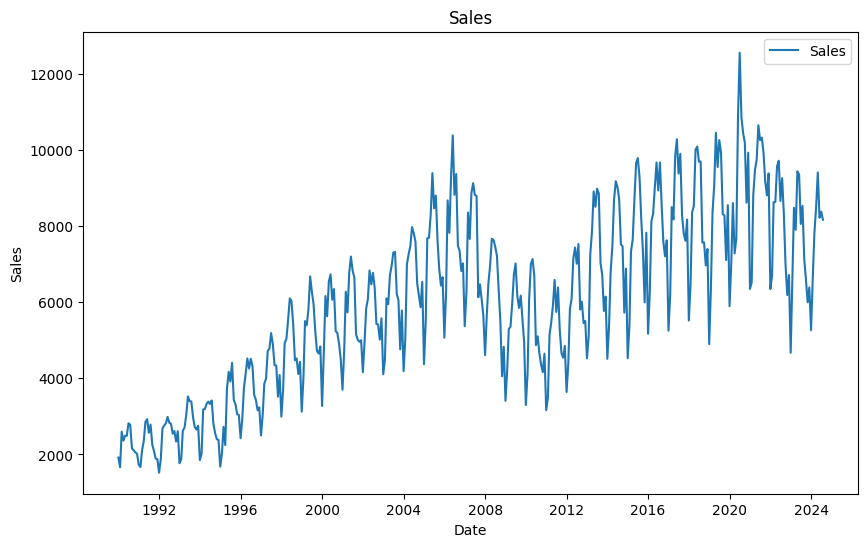

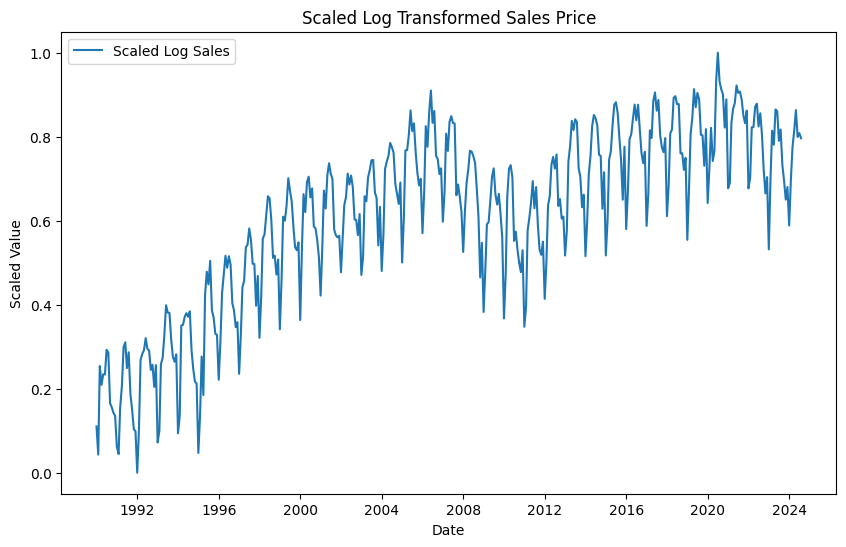

['scaler.pkl']

In [ ]:
#Lets preprocess


# Visualize the scaled data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], label='Sales')
plt.title('Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

import numpy as np
# Log transform the target variable
data['log_Sales'] = np.log(data['Sales'])

# Normalize the target variable
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_log_Sales'] = scaler.fit_transform(data[['log_Sales']])

# Visualize the scaled data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['scaled_log_Sales'], label='Scaled Log Sales')
plt.title('Scaled Log Transformed Sales Price')
plt.xlabel('Date')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

# Save the scaler for later use (for inverse transformation)
import joblib
joblib.dump(scaler, 'scaler.pkl')


In [ ]:
#Prepare Sequences for LSTM


# Function to create sequences
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i])  # Input: last `sequence_length` values
        y.append(data[i])  # Output: next value
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 12

# Generate sequences
sequences = data['scaled_log_Sales'].values
x, y = create_sequences(sequences, sequence_length)

print(f"x shape: {x.shape}, y shape: {y.shape}")


x shape: (404, 12), y shape: (404,)


In [ ]:
#Split

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


x_train shape: (323, 12), x_test shape: (81, 12)
y_train shape: (323,), y_test shape: (81,)


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.1836 - val_loss: 0.0636
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0436 - val_loss: 0.0344
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0213 - val_loss: 0.0098
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0154 - val_loss: 0.0107
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - val_loss: 0.0102
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - val_loss: 0.0105
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - val_loss: 0.0098
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0165 - val_loss: 0.0108
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0159 - val_loss: 0.0102
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0152 - val_loss: 0.0128
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - val_loss: 0.0094
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0

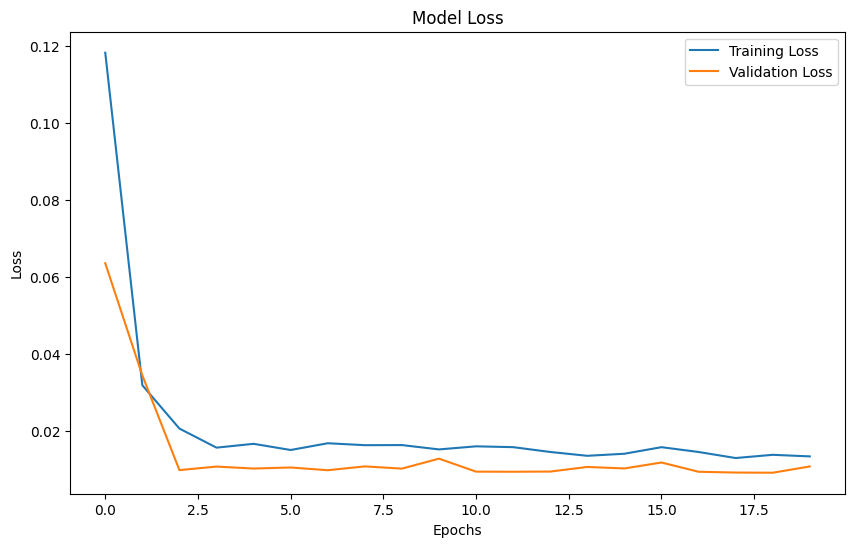

In [ ]:

#build the model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Forecast

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 
Test Loss: 0.00912619847804308
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step
Actual vs. Predicted Values:
     Actual  Predicted
0  9.008591   9.015795
1  8.616133   9.020927
2  8.775704   9.026449
3  9.032051   9.020069
4  9.051813   9.005979


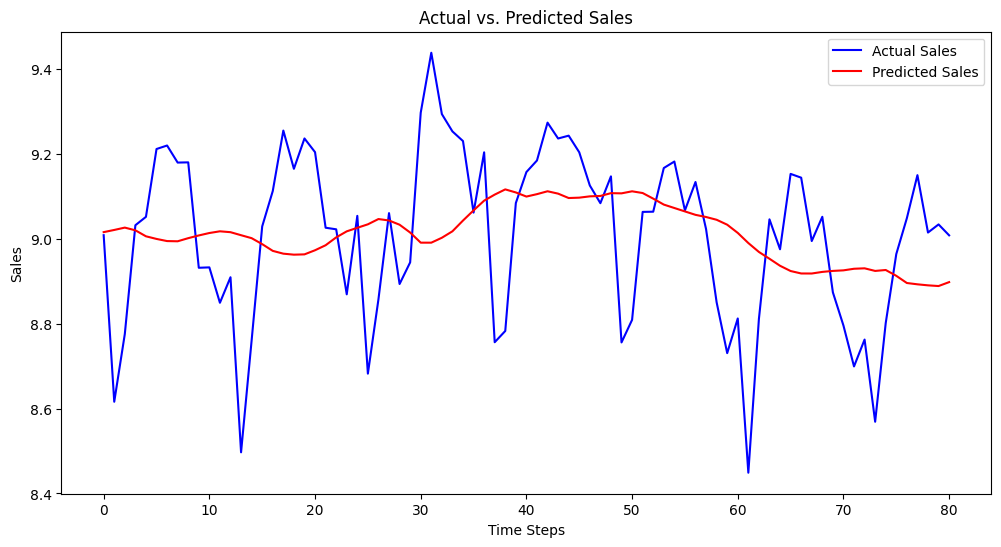

Root Mean Squared Error (RMSE): 0.2018919331797329
R-squared (R²): -0.02824459205027896


<Sequential name=sequential_10, built=True>

In [ ]:
#Training with a Catch -- Seasonality!!!


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure `scaler` is available from training
# It should have been fitted earlier like this:
# scaler = MinMaxScaler(feature_range=(0, 1))
# y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Evaluate the model on the test data
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions on the test data
predictions = model.predict(x_test)

# Rescale the predictions and the actual values back to their original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test_rescaled.flatten(),
    'Predicted': predictions_rescaled.flatten()
})

# Display the first few rows of the comparison DataFrame
print("Actual vs. Predicted Values:")
print(comparison_df.head())

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Actual Sales', color='blue')
plt.plot(range(len(predictions_rescaled)), predictions_rescaled, label='Predicted Sales', color='red')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Time Steps')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

model

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.2763 - val_loss: 0.0120
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0604 - val_loss: 0.0503
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0276 - val_loss: 0.0186
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0196 - val_loss: 0.0123
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0164 - val_loss: 0.0073
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0087 - val_loss: 0.0059
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0063 - val_loss: 0.0039
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0075 - val_loss: 0.0039
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0070 - val_loss: 0.0037
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

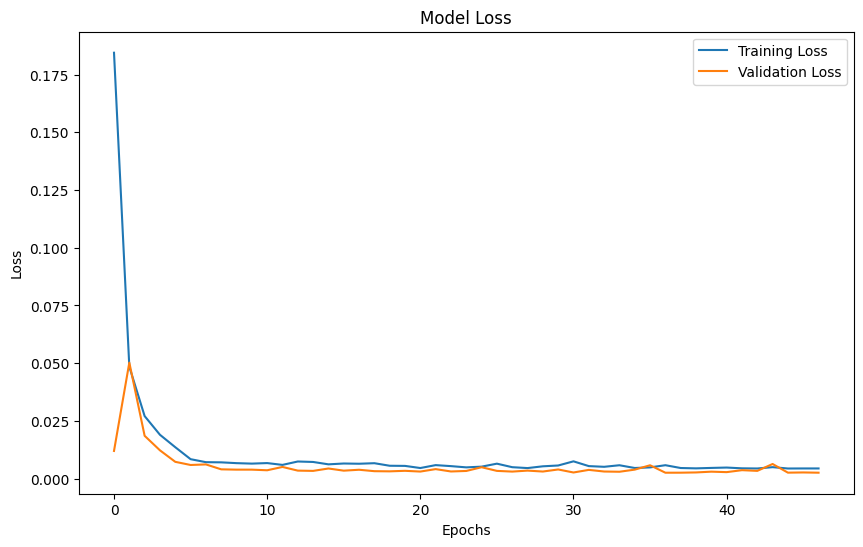

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 
Test Loss: 0.002592101925984025
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
Actual vs. Predicted Values:
     Actual  Predicted
0  9.008591   8.851096
1  8.616133   8.667723
2  8.775704   8.778443
3  9.032051   8.995349
4  9.051813   9.061327


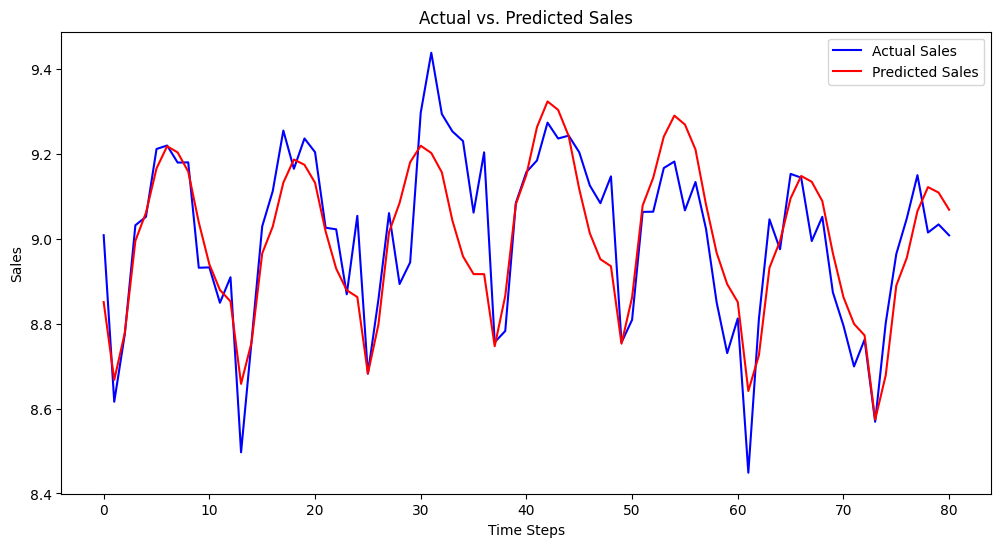

Root Mean Squared Error (RMSE): 0.1075969287945773
R-squared (R²): 0.707949300159365


In [ ]:
#Lets consider seasonality


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Ensure the data is sorted by Date
data = data.sort_values(by='Date')

# Step 2: Extract time-based features (month and quarter)
data['month'] = data['Date'].dt.month
data['quarter'] = data['Date'].dt.quarter

# One-hot encode month and quarter
one_hot_encoder = OneHotEncoder(sparse_output=False)  # Correct argument
encoded_months = one_hot_encoder.fit_transform(data[['month']])
encoded_quarters = one_hot_encoder.fit_transform(data[['quarter']])

# Append the encoded features to the data
month_columns = [f'month_{i}' for i in range(1, 13)]
quarter_columns = [f'quarter_{i}' for i in range(1, 5)]

encoded_months_df = pd.DataFrame(encoded_months, columns=month_columns, index=data.index)
encoded_quarters_df = pd.DataFrame(encoded_quarters, columns=quarter_columns, index=data.index)

# Combine with the original data
data = pd.concat([data, encoded_months_df, encoded_quarters_df], axis=1)

# Step 3: Scale the target variable
data['log_Sales'] = np.log(data['Sales'])
scaler = MinMaxScaler(feature_range=(0, 1))
data['scaled_log_Sales'] = scaler.fit_transform(data[['log_Sales']])

# Step 4: Create sequences for LSTM
def create_sequences(data, features, target, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[features].iloc[i-sequence_length:i].values)  # Use past `sequence_length` features
        y.append(data[target].iloc[i])  # Use the current target value
    return np.array(x), np.array(y)

# Define the feature columns (include one-hot encoded months and quarters)
feature_columns = ['scaled_log_Sales'] + month_columns + quarter_columns

# Define the sequence length
sequence_length = 12

# Generate sequences
x, y = create_sequences(data, feature_columns, 'scaled_log_Sales', sequence_length)

# Split into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Step 6: Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 7: Evaluate the model on test data
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(x_test)

# Rescale predictions and actual values back to original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 8: Compare actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test_rescaled.flatten(),
    'Predicted': predictions_rescaled.flatten()
})

print("Actual vs. Predicted Values:")
print(comparison_df.head())

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label='Actual Sales', color='blue')
plt.plot(range(len(predictions_rescaled)), predictions_rescaled, label='Predicted Sales', color='red')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Time Steps')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 9: Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


#### Forecast into future

Last sequence shape before reshape: (12, 17)
Last sequence shape after reshape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)
Updated last_sequence shape: (1, 12, 17)


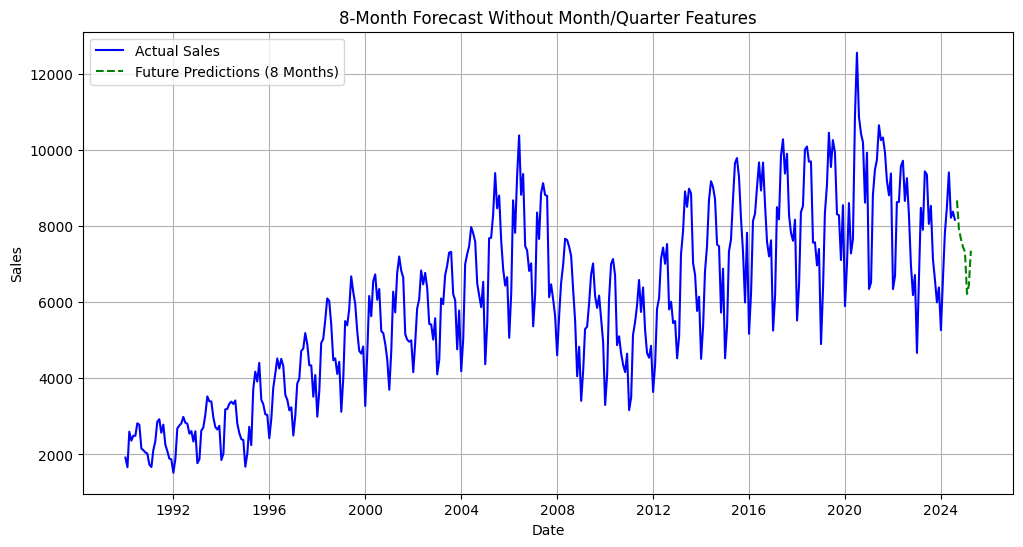

Future Predictions for the Next 8 Months:
            Predicted Sales
Date                       
2024-09-01      8678.098633
2024-10-01      7927.236816
2024-11-01      7661.842773
2024-12-01      7462.034668
2025-01-01      7322.501953
2025-02-01      6221.595215
2025-03-01      6448.763184
2025-04-01      7355.741211


In [ ]:
# Prepare for future prediction

sequence_length = 12
num_features = x_train.shape[2]  # Number of features during training

# Step 1: Prepare the last sequence from the test data
last_sequence = x_test[-1]  # Take the last sequence from the test data
print(f"Last sequence shape before reshape: {last_sequence.shape}")

# Reshape for LSTM input
last_sequence = last_sequence.reshape(1, sequence_length, num_features)
print(f"Last sequence shape after reshape: {last_sequence.shape}")

# Generate predictions
future_predictions = []  # Store future predictions
for step in range(8):  # Predict for the next 8 months
    # Predict the next value
    next_prediction = model.predict(last_sequence, verbose=0)
    future_predictions.append(next_prediction[0, 0])  # Store the predicted value

    # Create a new feature row for the next time step
    new_features = np.zeros(num_features)
    new_features[0] = next_prediction[0, 0]  # Add the predicted scaled sales value

    # Update the last sequence with the new features
    last_sequence = np.append(last_sequence[:, 1:, :], new_features.reshape(1, 1, num_features), axis=1)
    print(f"Updated last_sequence shape: {last_sequence.shape}")

# Rescale predictions back to the original scale
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_predictions_actual = np.exp(future_predictions_rescaled)  # Reverse log transformation

# Generate future dates
future_dates = pd.date_range(start=data['Date'].iloc[-1], periods=9, freq='MS')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Sales': future_predictions_actual.flatten()
})
future_df.set_index('Date', inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Sales'], label='Actual Sales', color='blue')
plt.plot(future_df.index, future_df['Predicted Sales'], label='Future Predictions (8 Months)', color='green', linestyle='--')
plt.title('8-Month Forecast Without Month/Quarter Features')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print the future predictions
print("Future Predictions for the Next 8 Months:")
print(future_df)


# XGBoost | NO EXOGENOUS

### **Median Price**

In [ ]:
import xgboost as xgb

In [ ]:
# Load the data
# For Median Price

file_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Colab/Housing_Activity_Median_Price.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Ensure data is sorted by Date
data = data.sort_values(by='Date')

# Rename columns for consistency with modeling
data.rename(columns={'Date': 'ds', 'Median Price': 'y'}, inplace=True)
print(data.head())


          ds      y  FEDFUNDS  MORTGAGE30US
0 1990-01-01  86453      8.23        9.8950
1 1990-02-01  85389      8.24       10.1975
2 1990-03-01  84544      8.28       10.2680
3 1990-04-01  83737      8.26       10.3700
4 1990-05-01  84154      8.18       10.4775


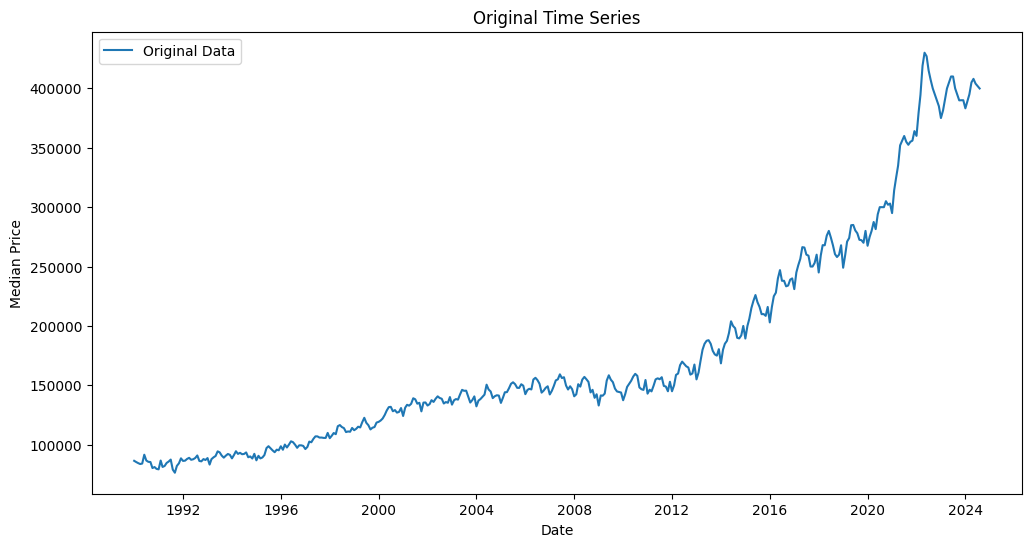

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Original Data')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.show()


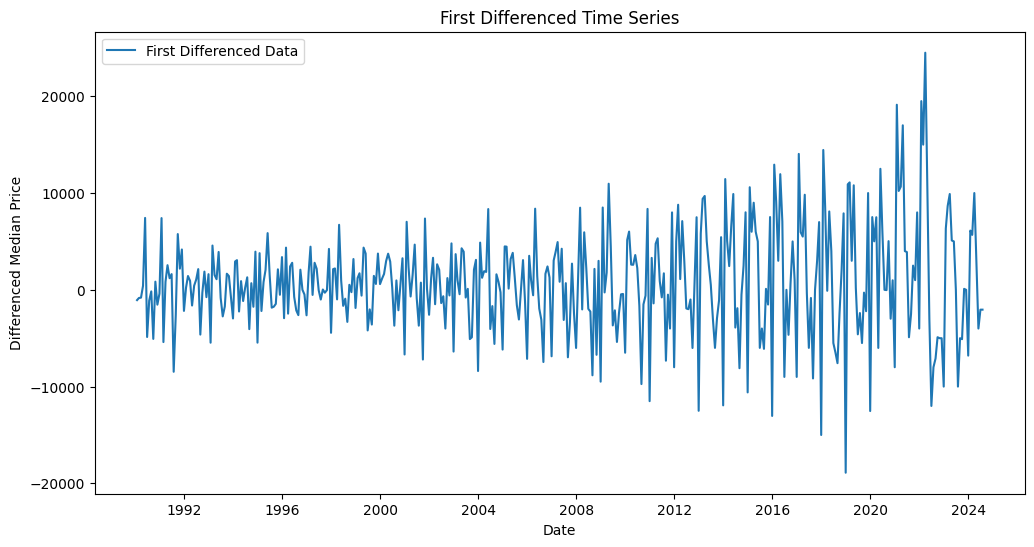

In [ ]:
#1st Difference

data['first_diff'] = data['y'].diff()
data = data.dropna()  # Remove NaN values

# Plot first-differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['first_diff'], label='First Differenced Data')
plt.title('First Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Median Price')
plt.legend()
plt.show()


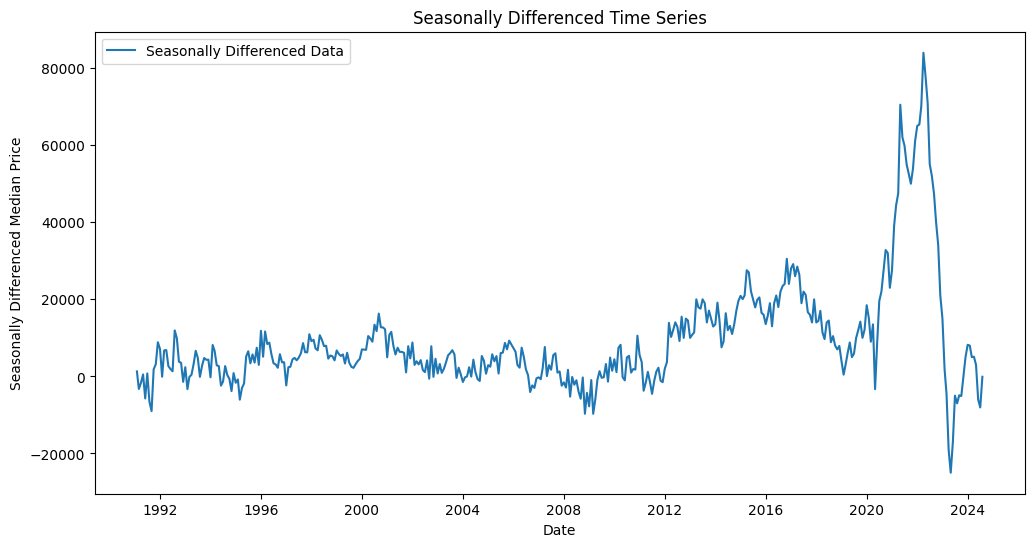

In [ ]:
#2nd Difference

data['seasonal_diff'] = data['y'] - data['y'].shift(12)
data = data.dropna()

# Plot seasonally differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['seasonal_diff'], label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonally Differenced Median Price')
plt.legend()
plt.show()


#### ADF Test

In [ ]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['seasonal_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -3.214129987721834
p-value: 0.019181211134062775
The series is stationary.


In [ ]:
# Add lag features
for lag in range(1, 13):  # Create lags up to 12 months
    data[f'lag_{lag}'] = data['seasonal_diff'].shift(lag)

data = data.dropna()  # Remove NaN values created by lagging


In [ ]:
# Define features and target
X = data[[f'lag_{i}' for i in range(1, 13)]].values  # Lag features
y = data['seasonal_diff'].values  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
#Train

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Tree depth
    'n_estimators': [50, 100, 150],  # Number of trees
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of features for each tree
    'gamma': [0, 1, 5],  # Minimum loss reduction for further split
    'min_child_weight': [1, 5, 10],  # Minimum sum of weights for a split
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist')

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter combinations to try
    scoring='r2',  # Optimize for R²
    cv=3,  # Use 3-fold cross-validation
    verbose=1,  # Display progress
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Use the best model found during random search
best_model = random_search.best_estimator_

# Display the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Add evaluation metric to the model parameters
best_model.set_params(early_stopping_rounds=10)

# Train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True  # Log progress
)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.6}
[0]	validation_0-rmse:28419.16448
[1]	validation_0-rmse:27723.40341
[2]	validation_0-rmse:26983.70557
[3]	validation_0-rmse:26396.50107
[4]	validation_0-rmse:25875.56522
[5]	validation_0-rmse:25259.44064
[6]	validation_0-rmse:24712.64128
[7]	validation_0-rmse:24196.70248
[8]	validation_0-rmse:23794.38930
[9]	validation_0-rmse:23453.35243
[10]	validation_0-rmse:23313.01699
[11]	validation_0-rmse:22959.45573
[12]	validation_0-rmse:22841.43971
[13]	validation_0-rmse:22637.46080
[14]	validation_0-rmse:22415.30488
[15]	validation_0-rmse:22150.27271
[16]	validation_0-rmse:21965.64590
[17]	validation_0-rmse:21739.28718
[18]	validation_0-rmse:21594.31760
[19]	validation_0-rmse:21394.33913
[20]	validation_0-rmse:21261.57709
[21]	validation_0-rmse:21189.65049
[22]	validation_0

#### Forecast

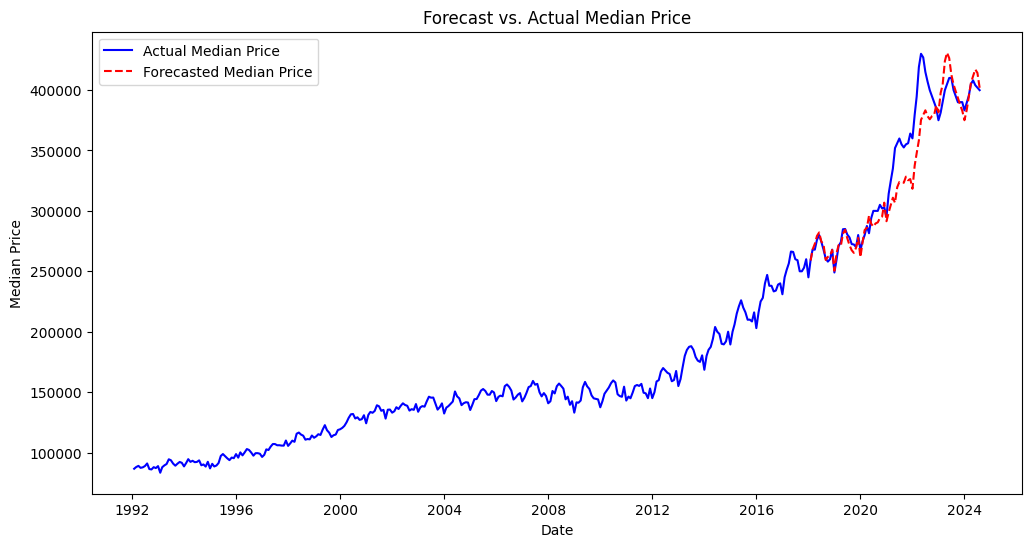

In [ ]:
# Reverse seasonal differencing
data['forecast'] = np.nan
data['forecast'].iloc[-len(y_test):] = y_pred
data['reversed_forecast'] = data['forecast'] + data['y'].shift(12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')
plt.plot(data['ds'].iloc[-len(y_test):], data['reversed_forecast'].iloc[-len(y_test):],
         label='Forecasted Median Price', color='red', linestyle='--')
plt.title('Forecast vs. Actual Median Price')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.show()


#### Forecast into future

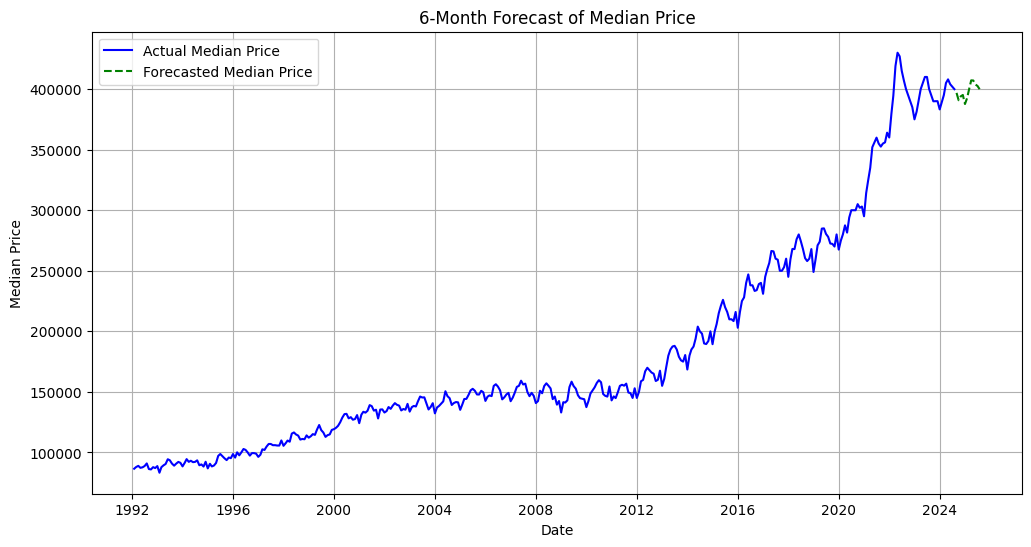

         Date  Forecasted Median Price
0  2024-09-01            396854.532959
1  2024-10-01            390795.097168
2  2024-11-01            394001.402100
3  2024-12-01            395115.088867
4  2025-01-01            387661.889648
5  2025-02-01            392611.342041
6  2025-03-01            399685.442871
7  2025-04-01            407196.352295
8  2025-05-01            407080.485107
9  2025-06-01            403769.168411
10 2025-07-01            402581.273865
11 2025-08-01            399849.093914


In [ ]:
future_lags = X_test[-1].reshape(1, -1)  # Start with the last test sequence
future_forecast = []

for _ in range(12):  # Predict for 12 months
    next_pred = best_model.predict(future_lags)[0]
    future_forecast.append(next_pred)

    # Update lags
    future_lags = np.roll(future_lags, -1)  # Shift lags
    future_lags[0, -1] = next_pred  # Append new prediction as the latest lag

# Convert to original scale
future_forecast_rescaled = future_forecast + data['y'].iloc[-12:].values

# Generate future dates
future_dates = pd.date_range(start=data['ds'].iloc[-1], periods=13, freq='MS')[1:]

# Combine into a DataFrame
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Median Price': future_forecast_rescaled})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')
plt.plot(future_df['Date'], future_df['Forecasted Median Price'], label='Forecasted Median Price', color='green', linestyle='--')
plt.title('6-Month Forecast of Median Price')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)
plt.show()

print(future_df)

### **Sales**

In [ ]:

# Load the data
file_path ="/content/drive/MyDrive/Colab Notebooks/Data Science Colab/Housing_Activity_Sales.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Ensure data is sorted by Date
data = data.sort_values(by='Date')

# Rename columns for consistency with modeling
data.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

print(data.head())


          ds     y  FEDFUNDS  MORTGAGE30US
0 1990-01-01  1916      8.23        9.8950
1 1990-02-01  1663      8.24       10.1975
2 1990-03-01  2596      8.28       10.2680
3 1990-04-01  2362      8.26       10.3700
4 1990-05-01  2491      8.18       10.4775


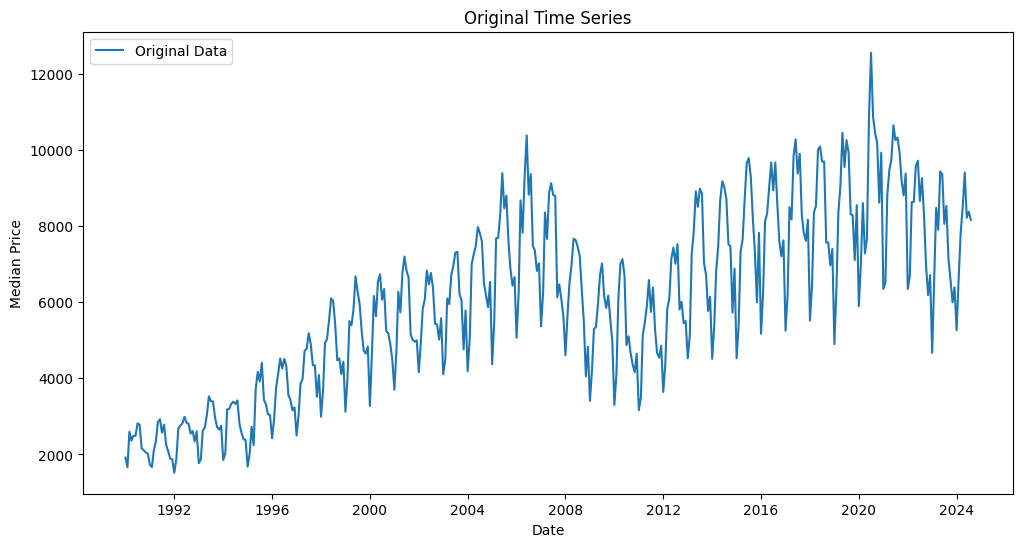

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Original Data')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.show()


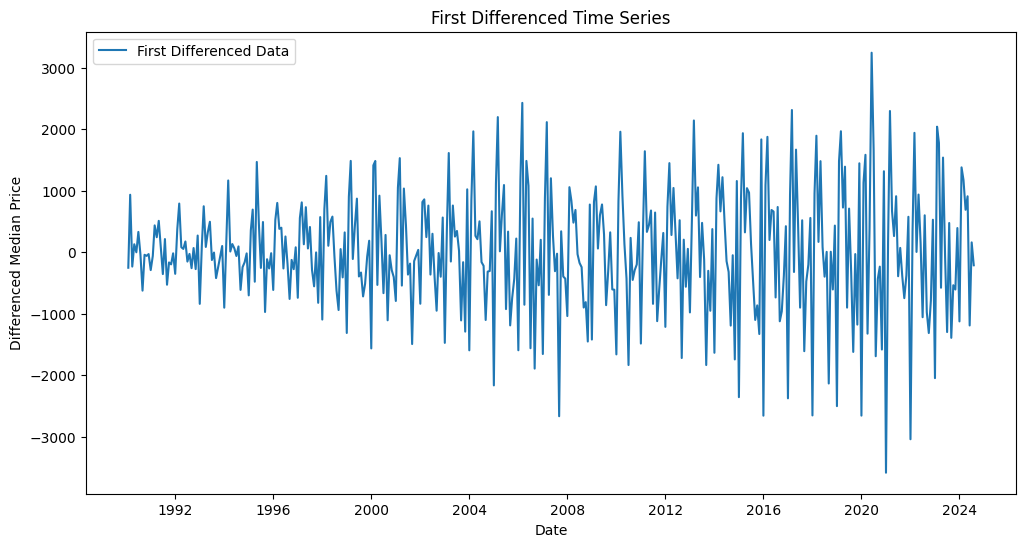

In [ ]:
#1st Difference

data['first_diff'] = data['y'].diff()
data = data.dropna()  # Remove NaN values

# Plot first-differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['first_diff'], label='First Differenced Data')
plt.title('First Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Median Price')
plt.legend()
plt.show()


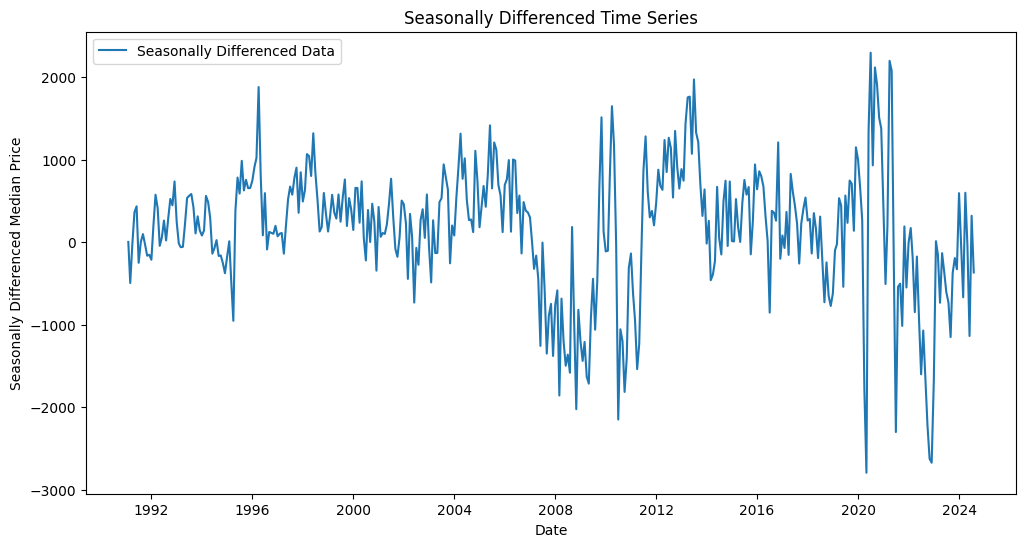

In [ ]:
#2nd Difference

data['seasonal_diff'] = data['y'] - data['y'].shift(12)
data = data.dropna()

# Plot seasonally differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['seasonal_diff'], label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonally Differenced Median Price')
plt.legend()
plt.show()


#### ADF Test

In [ ]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['seasonal_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -3.5694753925039273
p-value: 0.006372134131058254
The series is stationary.


In [ ]:
# Add lag features
for lag in range(1, 13):  # Create lags up to 12 months
    data[f'lag_{lag}'] = data['seasonal_diff'].shift(lag)

data = data.dropna()  # Remove NaN values created by lagging


In [ ]:
#SPLIT

# Define features and target
X = data[[f'lag_{i}' for i in range(1, 13)]].values  # Lag features
y = data['seasonal_diff'].values  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [ ]:
#Train

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Tree depth
    'n_estimators': [50, 100, 150],  # Number of trees
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of features for each tree
    'gamma': [0, 1, 5],  # Minimum loss reduction for further split
    'min_child_weight': [1, 5, 10],  # Minimum sum of weights for a split
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist')

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter combinations to try
    scoring='r2',  # Optimize for R²
    cv=3,  # Use 3-fold cross-validation
    verbose=1,  # Display progress
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Use the best model found during random search
best_model = random_search.best_estimator_

# Display the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Add evaluation metric to the model parameters
best_model.set_params(early_stopping_rounds=10)

# Train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True  # Log progress
)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.8}
[0]	validation_0-rmse:1111.13491
[1]	validation_0-rmse:1092.01694
[2]	validation_0-rmse:1074.50203
[3]	validation_0-rmse:1060.63962
[4]	validation_0-rmse:1054.76325
[5]	validation_0-rmse:1041.59376
[6]	validation_0-rmse:1026.92605
[7]	validation_0-rmse:1015.33042
[8]	validation_0-rmse:1005.12663
[9]	validation_0-rmse:998.33559
[10]	validation_0-rmse:987.22445
[11]	validation_0-rmse:977.31263
[12]	validation_0-rmse:967.69601
[13]	validation_0-rmse:959.51681
[14]	validation_0-rmse:954.88399
[15]	validation_0-rmse:948.69464
[16]	validation_0-rmse:944.22585
[17]	validation_0-rmse:939.53964
[18]	validation_0-rmse:935.05898
[19]	validation_0-rmse:932.22493
[20]	validation_0-rmse:930.48304
[21]	validation_0-rmse:924.67589
[22]	validation_0-rmse:919.95353
[23]	validation_0-r

#### Forecast

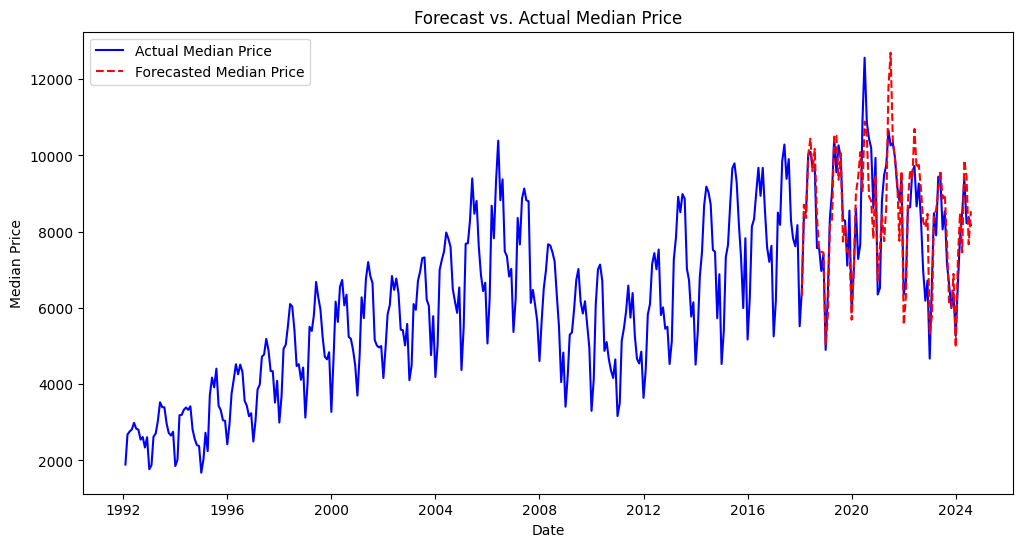

In [ ]:
# Reverse seasonal differencing
data['forecast'] = np.nan
data['forecast'].iloc[-len(y_test):] = y_pred
data['reversed_forecast'] = data['forecast'] + data['y'].shift(12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')
plt.plot(data['ds'].iloc[-len(y_test):], data['reversed_forecast'].iloc[-len(y_test):],
         label='Forecasted Median Price', color='red', linestyle='--')
plt.title('Forecast vs. Actual Median Price')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.show()


#### Foreast into future

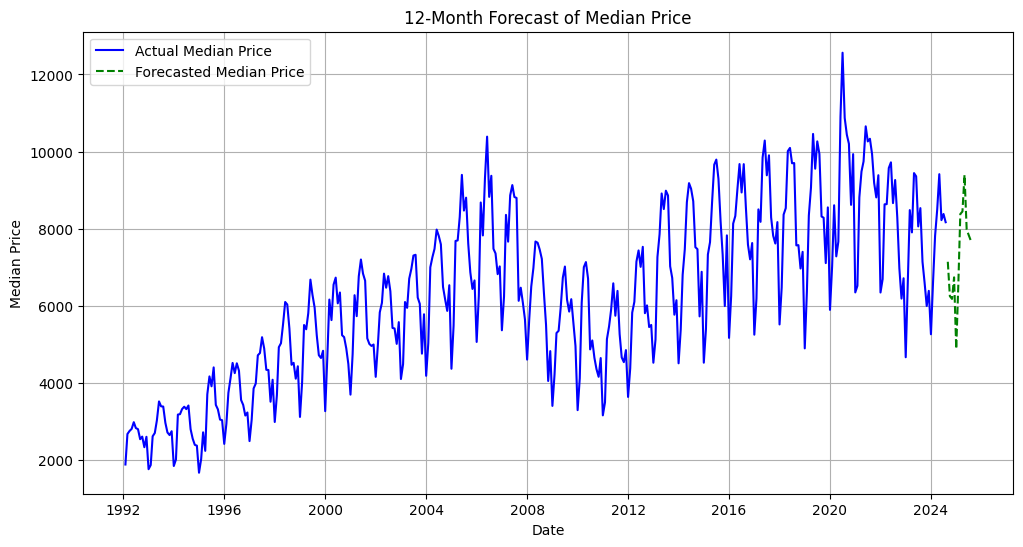

         Date  Forecasted Median Price
0  2024-09-01              7144.612599
1  2024-10-01              6253.382812
2  2024-11-01              6181.856583
3  2024-12-01              6741.005615
4  2025-01-01              4886.148926
5  2025-02-01              6598.899464
6  2025-03-01              8382.028809
7  2025-04-01              8448.503258
8  2025-05-01              9397.998190
9  2025-06-01              7983.675613
10 2025-07-01              7834.375366
11 2025-08-01              7687.901886


In [ ]:
# Prepare for future forecasting
future_lags = X_test[-1].reshape(1, -1)  # Start with the last test sequence
future_forecast = []

for _ in range(12):  # Predict for 12 months
    next_pred = best_model.predict(future_lags)[0]
    future_forecast.append(next_pred)

    # Update lags
    future_lags = np.roll(future_lags, -1)  # Shift lags
    future_lags[0, -1] = next_pred  # Append new prediction as the latest lag

# Convert to original scale
future_forecast_rescaled = future_forecast + data['y'].iloc[-12:].values

# Generate future dates
future_dates = pd.date_range(start=data['ds'].iloc[-1], periods=13, freq='MS')[1:]

# Combine into a DataFrame
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Median Price': future_forecast_rescaled})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')
plt.plot(future_df['Date'], future_df['Forecasted Median Price'], label='Forecasted Median Price', color='green', linestyle='--')
plt.title('12-Month Forecast of Median Price')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)
plt.show()

print(future_df)


# XGBoost | EXOGENOUS

### **Median Price**

In [ ]:
# Load the data
# For Median Price

file_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Colab/Housing_Activity_Median_Price.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Ensure data is sorted by Date
data = data.sort_values(by='Date')

# Rename columns for consistency with modeling
data.rename(columns={'Date': 'ds', 'Median Price': 'y'}, inplace=True)

print(data.head())


          ds      y  FEDFUNDS  MORTGAGE30US
0 1990-01-01  86453      8.23        9.8950
1 1990-02-01  85389      8.24       10.1975
2 1990-03-01  84544      8.28       10.2680
3 1990-04-01  83737      8.26       10.3700
4 1990-05-01  84154      8.18       10.4775


Correlation Matrix:
                     y  FEDFUNDS  MORTGAGE30US
y             1.000000 -0.335256     -0.550681
FEDFUNDS     -0.335256  1.000000      0.866989
MORTGAGE30US -0.550681  0.866989      1.000000


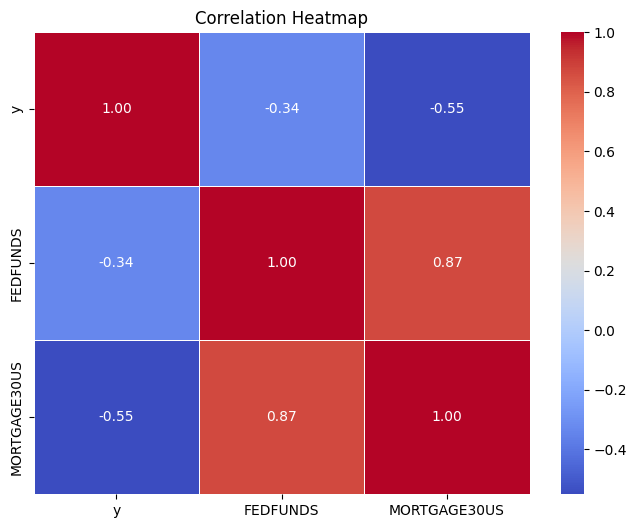

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns (Median Price, FEDFUNDS, MORTGAGE30US)
correlation_data = data[['y', 'FEDFUNDS', 'MORTGAGE30US']]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#Since it has a stronger correlation with y compared to FEDFUNDS, it's a better candidate to include as a predictor in your XGBoost model.


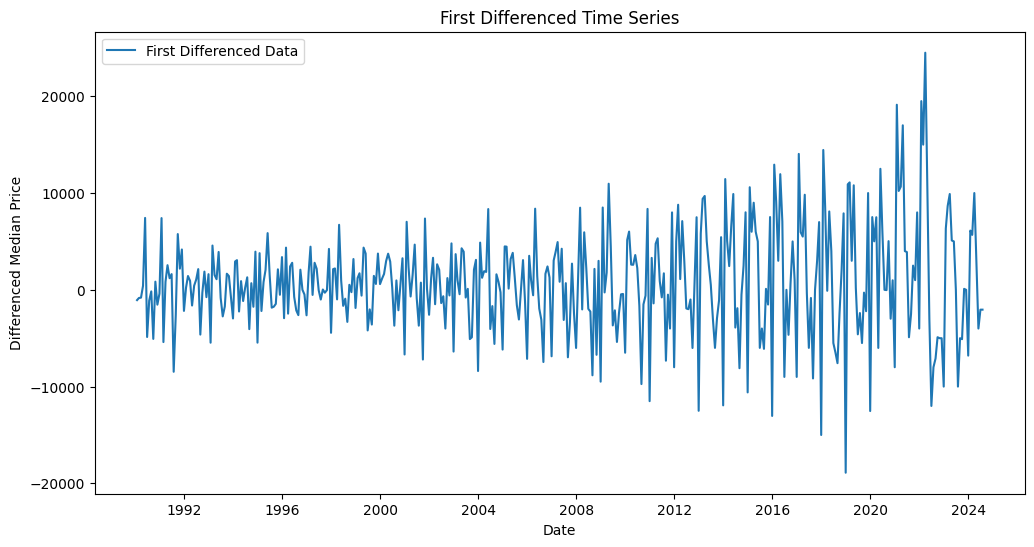

In [ ]:
#1st Diff


data['first_diff'] = data['y'].diff()
data = data.dropna()  # Remove NaN values

# Plot first-differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['first_diff'], label='First Differenced Data')
plt.title('First Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Median Price')
plt.legend()
plt.show()


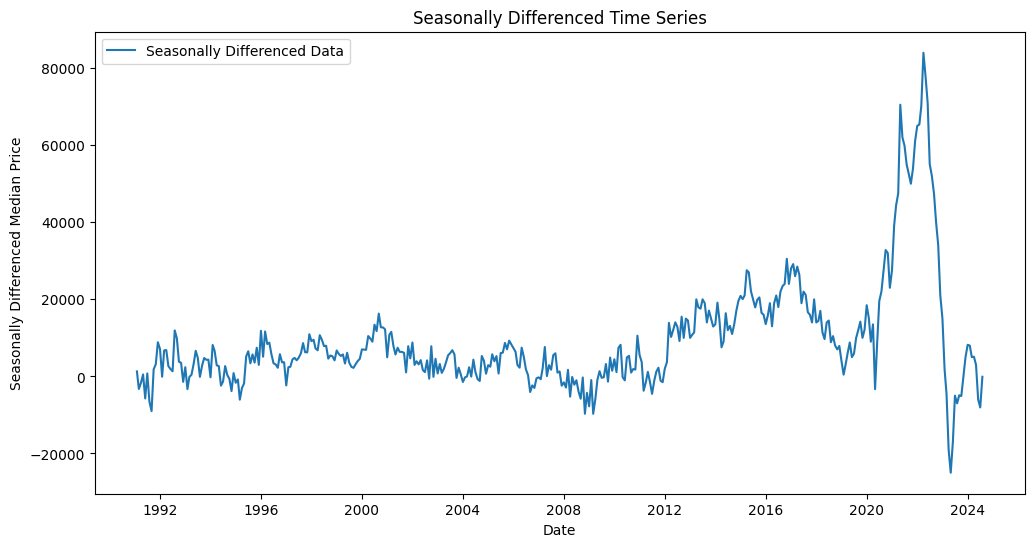

In [ ]:
#2nd Diff

data['seasonal_diff'] = data['y'] - data['y'].shift(12)
data = data.dropna()

# Plot seasonally differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['seasonal_diff'], label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonally Differenced Median Price')
plt.legend()
plt.show()


#### ADF Test

In [ ]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(data['seasonal_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -3.214129987721834
p-value: 0.019181211134062775
The series is stationary.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create lagged features for the target variable
for i in range(1, 13):
    data[f'lag_{i}'] = data['seasonal_diff'].shift(i)

# Ensure alignment by dropping NaN values
data = data.dropna()

# Scale the exogenous variable (MORTGAGE30US)
scaler_exo = MinMaxScaler(feature_range=(0, 1))
# Scale the exogenous variable (MORTGAGE30US)
data.loc[:, 'scaled_mortgage'] = scaler_exo.fit_transform(data[['MORTGAGE30US']])

# Define features and target
lag_features = [f'lag_{i}' for i in range(1, 13)]
exo_feature = ['scaled_mortgage']
all_features = lag_features + exo_feature

X = data[all_features].values  # Combined lag and exogenous features
y = data['seasonal_diff'].values  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Display shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (312, 13), y_train shape: (312,)
X_test shape: (79, 13), y_test shape: (79,)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
[0]	validation_0-rmse:27578.29896
[1]	validation_0-rmse:26054.29893
[2]	validation_0-rmse:24684.05169
[3]	validation_0-rmse:23642.73456
[4]	validation_0-rmse:22781.86933
[5]	validation_0-rmse:21979.98983
[6]	validation_0-rmse:21734.90343
[7]	validation_0-rmse:21677.45718
[8]	validation_0-rmse:21597.76721
[9]	validation_0-rmse:21498.52071
[10]	validation_0-rmse:21284.05950
[11]	validation_0-rmse:21141.35265
[12]	validation_0-rmse:21078.82557
[13]	validation_0-rmse:20919.29476
[14]	validation_0-rmse:20833.72507
[15]	validation_0-rmse:20765.85996
[16]	validation_0-rmse:20712.46472
[17]	validation_0-rmse:20735.10296
[18]	validation_0-rmse:20750.29015
[19]	validation_0-rmse:20780.05611
[20]	validation_0-rmse:20686.24520
[21]	validation_0-rmse:20596.68989
[22]	validation_0-r

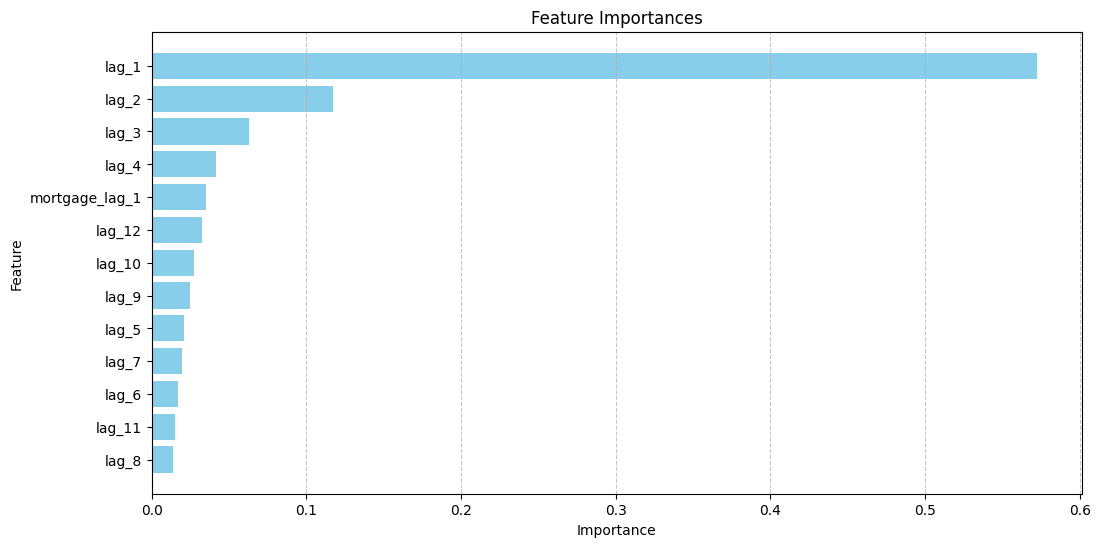

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Tree depth
    'n_estimators': [50, 100, 150],  # Number of trees
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of features for each tree
    'gamma': [0, 1, 5],  # Minimum loss reduction for further split
    'min_child_weight': [1, 5, 10],  # Minimum sum of weights for a split
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist')

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter combinations to try
    scoring='r2',  # Optimize for R²
    cv=3,  # Use 3-fold cross-validation
    verbose=1,  # Display progress
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Use the best model found during random search
best_model = random_search.best_estimator_

# Display the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Add evaluation metric to the model parameters
best_model.set_params(early_stopping_rounds=10)

# Train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True  # Log progress
)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")

# Get feature importances from the trained model
feature_importances = best_model.feature_importances_

# Verify the number of features matches
print(f"Number of features in the model: {len(feature_importances)}")
print(f"Number of features in X_train: {X_train.shape[1]}")

# Ensure the feature names match the number of features in X_train
feature_names = [f'lag_{i}' for i in range(1, 13)] + [f'mortgage_lag_{i}' for i in range(1, X_train.shape[1] - 12 + 1)]

# Check if the lengths match
if len(feature_names) != len(feature_importances):
    raise ValueError(f"Feature names length ({len(feature_names)}) does not match feature importances length ({len(feature_importances)})")

# Create a DataFrame for feature importances
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



#### Forecast

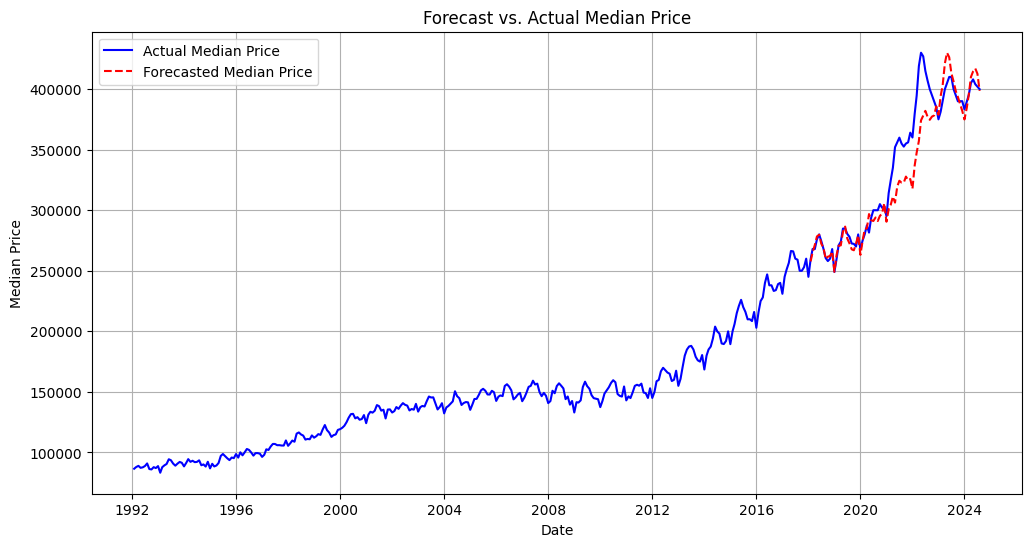

Forecasted vs Actual Data:
            ds       y      forecast  reversed_forecast
337 2018-02-01  259450  12694.216797      257738.216797
338 2018-03-01  268000  14357.899414      265357.899414
339 2018-04-01  267900  14775.608398      271275.608398
340 2018-05-01  276000  12019.434570      278344.434570
341 2018-06-01  280000  13771.682617      279771.682617
..         ...     ...           ...                ...
411 2024-04-01  405000  10077.930664      409977.930664
412 2024-05-01  408000   9579.864258      414579.864258
413 2024-06-01  404000   7000.208984      417000.208984
414 2024-07-01  401950   2670.897217      412670.897217
415 2024-08-01  399900  -1453.814819      398546.185181

[79 rows x 4 columns]


In [ ]:
# Reverse seasonal differencing
data['forecast'] = np.nan  # Initialize the forecast column with NaN
data.iloc[-len(y_test):, data.columns.get_loc('forecast')] = y_pred  # Fill forecast for the test data range
data['reversed_forecast'] = data['forecast'] + data['y'].shift(12)  # Reverse the seasonal differencing

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')
plt.plot(data['ds'].iloc[-len(y_test):], data['reversed_forecast'].iloc[-len(y_test):],
         label='Forecasted Median Price', color='red', linestyle='--')
plt.title('Forecast vs. Actual Median Price')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
forecast_df = data[['ds', 'y', 'forecast', 'reversed_forecast']].iloc[-len(y_test):]
print("Forecasted vs Actual Data:")
print(forecast_df)


In [ ]:
#Keep the Important Features -- (feature importances)


from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Ensure lagged features for 'scaled_mortgage' are created
for i in range(1, 4):  # Create 3 lagged features for 'scaled_mortgage'
    data[f'mortgage_lag_{i}'] = data['scaled_mortgage'].shift(i)

# Ensure alignment by dropping NaN values
data = data.dropna().reset_index(drop=True)

# Define important features based on feature importances
important_features = [
    f'lag_{i}' for i in range(1, 8)
] + ['mortgage_lag_1']  # Keep only the most important lags and exogenous feature

# Define X and y with reduced feature set
X_reduced = data[important_features].values
y = data['seasonal_diff'].values

# Train-test split
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, shuffle=False)

# Display shapes
print(f"X_train_reduced shape: {X_train_reduced.shape}, y_train shape: {y_train.shape}")
print(f"X_test_reduced shape: {X_test_reduced.shape}, y_test shape: {y_test.shape}")

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 5, 10],
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist')

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_reduced, y_train)

# Use the best model found during random search
best_model_reduced = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Train the best model with early stopping
best_model_reduced.fit(
    X_train_reduced, y_train,
    eval_set=[(X_test_reduced, y_test)],
    verbose=True  # Log progress
)

# Make predictions
y_pred_reduced = best_model_reduced.predict(X_test_reduced)

# Evaluate the model
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))

print(f"Root Mean Squared Error (RMSE) with Reduced Features: {rmse_reduced}")

print("")
print("")

# Compare RMSE
if rmse_reduced < rmse:
    print("Model performance improved by removing less important features!")
else:
    print("Model performance did not improve by removing less important features.")

print("")
print("")

# Display the features kept in the reduced feature set
print("Kept Features in the Reduced Feature Set:")
for feature in important_features:
    print(feature)






X_train_reduced shape: (63, 8), y_train shape: (63,)
X_test_reduced shape: (16, 8), y_test shape: (16,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}
[0]	validation_0-rmse:30563.60155
[1]	validation_0-rmse:29862.28889
[2]	validation_0-rmse:28002.96872
[3]	validation_0-rmse:26752.91291
[4]	validation_0-rmse:25981.94311
[5]	validation_0-rmse:24314.13365
[6]	validation_0-rmse:23199.54123
[7]	validation_0-rmse:22183.56141
[8]	validation_0-rmse:21429.22917
[9]	validation_0-rmse:20327.49579
[10]	validation_0-rmse:19645.70272
[11]	validation_0-rmse:18712.31133
[12]	validation_0-rmse:18420.14819
[13]	validation_0-rmse:18279.12609
[14]	validation_0-rmse:17929.88022
[15]	validation_0-rmse:17777.69985
[16]	validation_0-rmse:17586.38011
[17]	validation_0-rmse:17444.69566
[18]	validation_0-rmse:16649.99502
[19]	validation_0-rmse:16

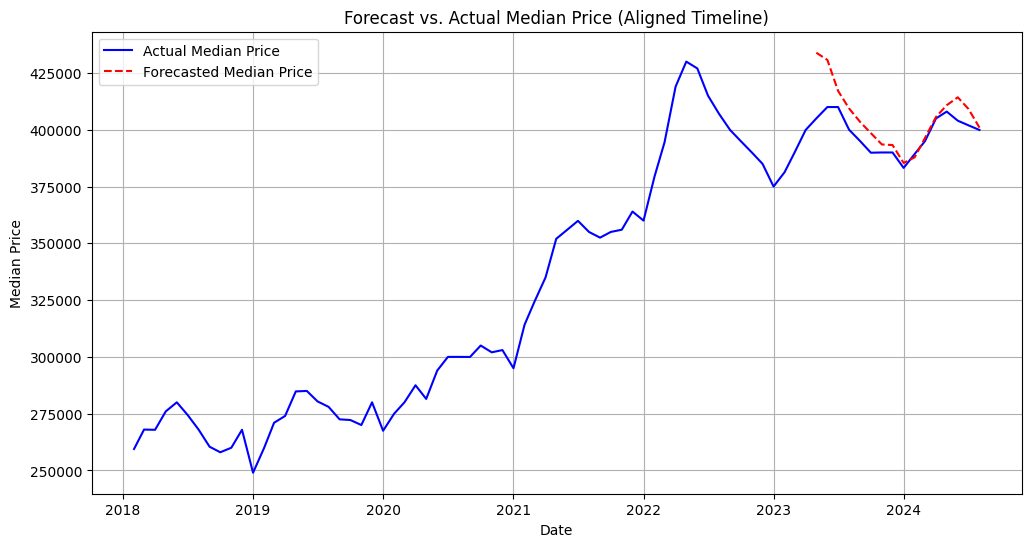

Forecasted vs Actual Data:
           ds       y      forecast  reversed_forecast
63 2023-05-01  405000   3919.223633      433919.223633
64 2023-06-01  410000   3748.779785      430748.779785
65 2023-07-01  410000   2136.127686      417136.127686
66 2023-08-01  400000   2363.364990      409363.364990
67 2023-09-01  395000   3533.337646      403433.337646
68 2023-10-01  389900   3533.337646      398533.337646
69 2023-11-01  390000   3533.337646      393533.337646
70 2023-12-01  390000   8261.080078      393261.080078
71 2024-01-01  383202  10383.865234      385383.865234
72 2024-02-01  389323   6528.368652      387863.368652
73 2024-03-01  395000   6406.806641      396406.806641
74 2024-04-01  405000   5769.055176      405669.055176
75 2024-05-01  408000   5806.618164      410806.618164
76 2024-06-01  404000   4292.987305      414292.987305
77 2024-07-01  401950   -833.804932      409166.195068
78 2024-08-01  399900    920.192505      400920.192505


In [ ]:
# Reverse seasonal differencing consistently
data['forecast'] = np.nan  # Initialize the forecast column with NaN
data.iloc[-len(y_test):, data.columns.get_loc('forecast')] = y_pred_reduced  # Fill forecast for the test data range
data['reversed_forecast'] = data['forecast'] + data['y'].shift(12)  # Reverse seasonal differencing for the forecast

# Plot the results across the full dataset
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')  # Plot the full actual data
plt.plot(data['ds'], data['reversed_forecast'], label='Forecasted Median Price', color='red', linestyle='--')  # Overlay forecast

# Add title and labels for consistency
plt.title('Forecast vs. Actual Median Price (Aligned Timeline)')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted vs actual values for the test period
forecast_df = data[['ds', 'y', 'forecast', 'reversed_forecast']].iloc[-len(y_test):]
print("Forecasted vs Actual Data:")
print(forecast_df)


#### Forecast into future

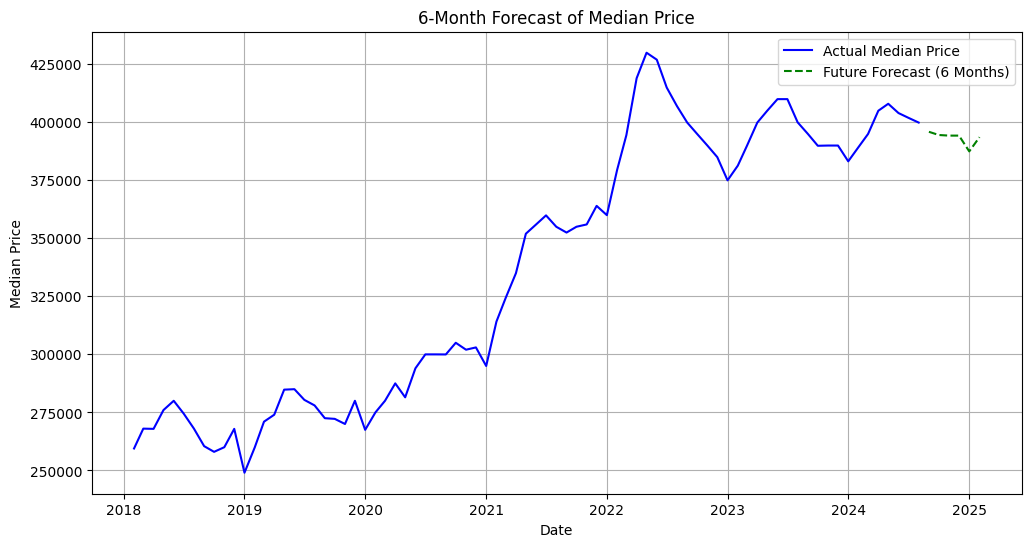

Future Forecast for the Next 6 Months:
          ds     forecast  reversed_forecast
0 2024-09-01   920.192505      395920.192505
1 2024-10-01  4638.081543      394538.081543
2 2024-11-01  4280.064941      394280.064941
3 2024-12-01  4280.064941      394280.064941
4 2025-01-01  4280.064941      387482.064941
5 2025-02-01  4280.064941      393603.064941


In [ ]:
# Prepare for future prediction
future_lags = X_reduced[-1].reshape(1, -1)  # Start with the last reduced feature set
future_forecast = []

for _ in range(6):  # Predict for 6 months
    next_pred = best_model_reduced.predict(future_lags)[0]  # Predict the next value
    future_forecast.append(next_pred)  # Store the prediction

    # Update lag features
    new_lags = np.roll(future_lags, -1)  # Shift lags to the left
    new_lags[0, -len(important_features):] = next_pred  # Append the new prediction as the most recent lag
    future_lags = new_lags.reshape(1, -1)  # Reshape for the next iteration

# Reverse seasonal differencing for the forecast
future_forecast_rescaled = [
    future_forecast[i] + data['y'].iloc[-12 + i] for i in range(len(future_forecast))
]

# Generate future dates
last_date = data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=7, freq='MS')[1:]

# Create a DataFrame for the future forecast
future_df = pd.DataFrame({
    'ds': future_dates,
    'forecast': future_forecast,
    'reversed_forecast': future_forecast_rescaled
})

# Plot future predictions along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')  # Historical data
plt.plot(future_df['ds'], future_df['reversed_forecast'], label='Future Forecast (6 Months)', color='green', linestyle='--')  # Future forecast

# Add plot details
plt.title('6-Month Forecast of Median Price')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the future forecast
print("Future Forecast for the Next 6 Months:")
print(future_df)


#### Key Insights:


1.   Slight Upward Trend: The forecast shows a minor increase in prices, suggesting some recovery after the recent dip.
2.   Stabilization: The forecast appears less volatile compared to past fluctuations, indicating a more stable market.
3. Conservative Prediction: The model’s predictions show moderate growth, potentially missing some sharper trends.
4. Possible Underfitting: The model’s stability may suggest it’s not capturing all recent price changes effectively.
5. Balanced Market: The market seems to be heading towards stability, with fewer expected large movements in the short term.

Sep Actual : $389900

### **Sales**

In [ ]:
# Load the data
# For Median Price

file_path = "/content/drive/MyDrive/Colab Notebooks/Data Science Colab/Housing_Activity_Sales.csv"
data = pd.read_csv(file_path, parse_dates=['Date'])

# Ensure data is sorted by Date
data = data.sort_values(by='Date')

# Rename columns for consistency with modeling
data.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

print(data.head())


          ds     y  FEDFUNDS  MORTGAGE30US
0 1990-01-01  1916      8.23        9.8950
1 1990-02-01  1663      8.24       10.1975
2 1990-03-01  2596      8.28       10.2680
3 1990-04-01  2362      8.26       10.3700
4 1990-05-01  2491      8.18       10.4775


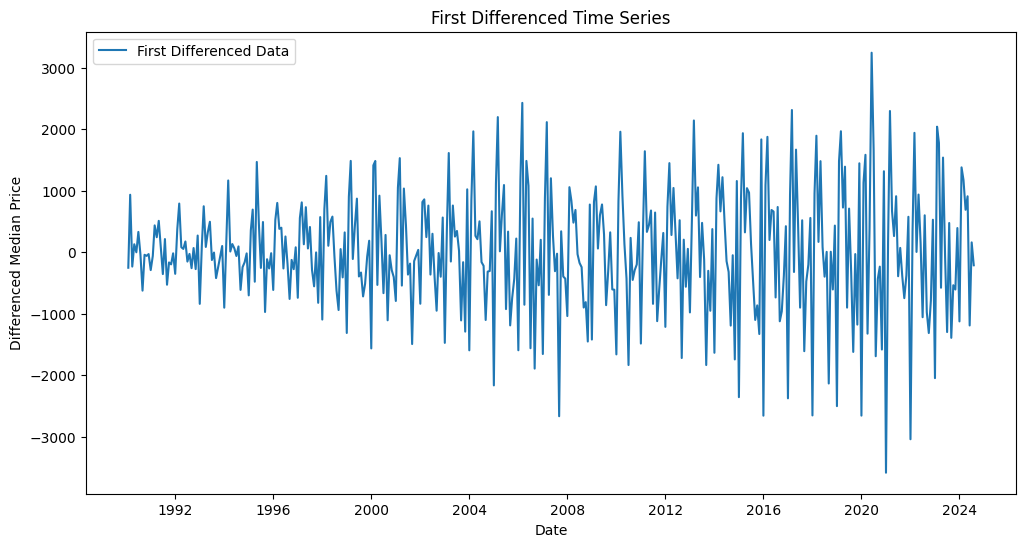

In [ ]:
data['first_diff'] = data['y'].diff()
data = data.dropna()  # Remove NaN values

# Plot first-differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['first_diff'], label='First Differenced Data')
plt.title('First Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Median Price')
plt.legend()
plt.show()


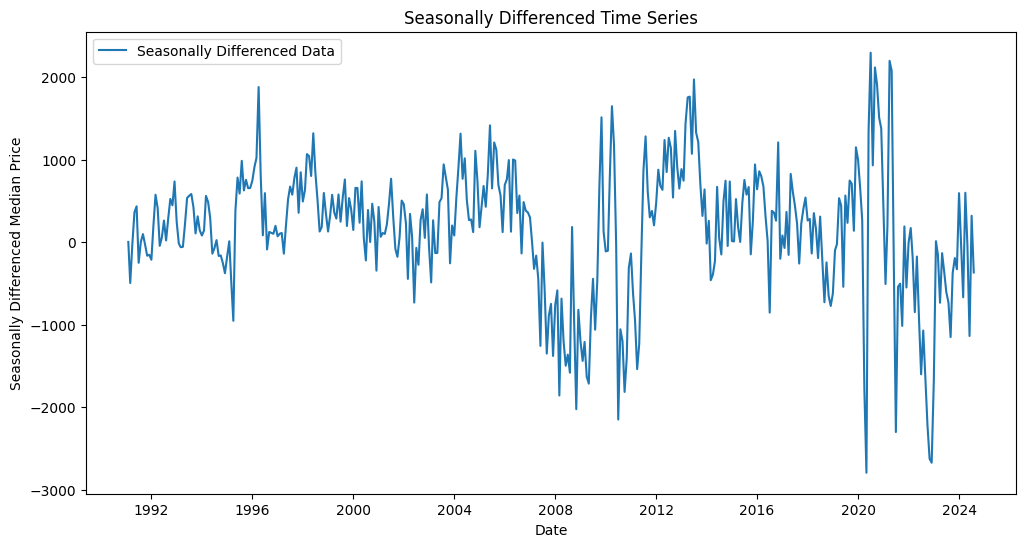

In [ ]:
data['seasonal_diff'] = data['y'] - data['y'].shift(12)
data = data.dropna()

# Plot seasonally differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['seasonal_diff'], label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Seasonally Differenced Median Price')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['seasonal_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: -3.5694753925039273
p-value: 0.006372134131058254
The series is stationary.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create lagged features for the target variable
for i in range(1, 13):
    data[f'lag_{i}'] = data['seasonal_diff'].shift(i)

# Ensure alignment by dropping NaN values
data = data.dropna()

# Scale the exogenous variable (MORTGAGE30US)
scaler_exo = MinMaxScaler(feature_range=(0, 1))
# Scale the exogenous variable (MORTGAGE30US)
data.loc[:, 'scaled_mortgage'] = scaler_exo.fit_transform(data[['MORTGAGE30US']])

# Define features and target
lag_features = [f'lag_{i}' for i in range(1, 13)]
exo_feature = ['scaled_mortgage']
all_features = lag_features + exo_feature

X = data[all_features].values  # Combined lag and exogenous features
y = data['seasonal_diff'].values  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Display shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (312, 13), y_train shape: (312,)
X_test shape: (79, 13), y_test shape: (79,)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Tree depth
    'n_estimators': [50, 100, 150],  # Number of trees
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of training data
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of features for each tree
    'gamma': [0, 1, 5],  # Minimum loss reduction for further split
    'min_child_weight': [1, 5, 10],  # Minimum sum of weights for a split
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist')

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random parameter combinations to try
    scoring='r2',  # Optimize for R²
    cv=3,  # Use 3-fold cross-validation
    verbose=1,  # Display progress
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available CPUs
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Use the best model found during random search
best_model = random_search.best_estimator_

# Display the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Add evaluation metric to the model parameters
best_model.set_params(early_stopping_rounds=10)

# Train the model with early stopping
best_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True  # Log progress
)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")




Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
[0]	validation_0-rmse:1109.01395
[1]	validation_0-rmse:1090.31084
[2]	validation_0-rmse:1074.19478
[3]	validation_0-rmse:1057.53467
[4]	validation_0-rmse:1045.85828
[5]	validation_0-rmse:1032.50304
[6]	validation_0-rmse:1021.77105
[7]	validation_0-rmse:1010.53026
[8]	validation_0-rmse:999.38840
[9]	validation_0-rmse:991.74824
[10]	validation_0-rmse:984.30242
[11]	validation_0-rmse:976.39720
[12]	validation_0-rmse:968.55514
[13]	validation_0-rmse:958.67003
[14]	validation_0-rmse:949.04384
[15]	validation_0-rmse:941.46112
[16]	validation_0-rmse:936.01634
[17]	validation_0-rmse:932.34862
[18]	validation_0-rmse:928.23097
[19]	validation_0-rmse:922.20997
[20]	validation_0-rmse:920.62068
[21]	validation_0-rmse:914.20635
[22]	validation_0-rmse:911.91146
[23]	validation_0-rm

#### Forecast

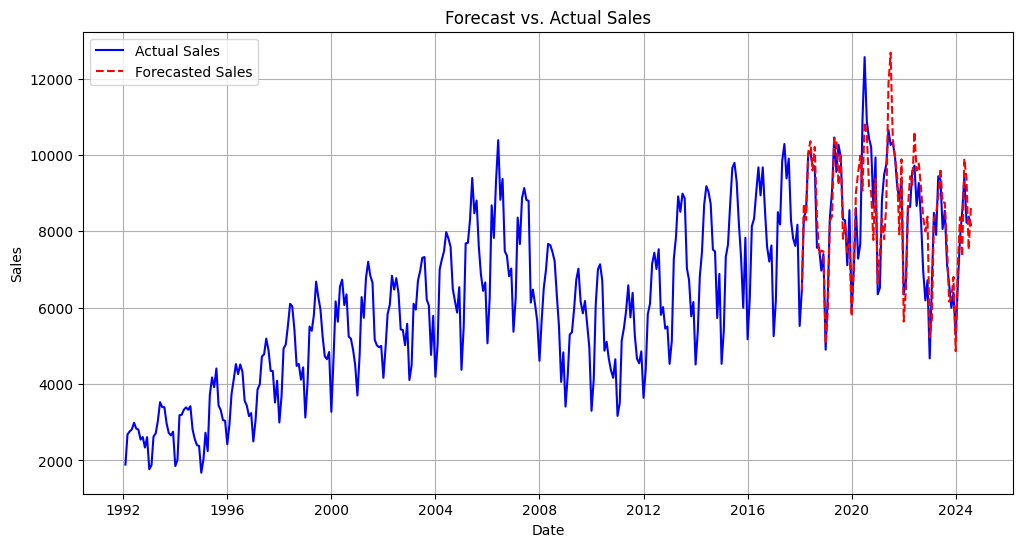

Forecasted vs Actual Data:
            ds      y    forecast  reversed_forecast
337 2018-02-01   6475  260.603760        6452.603760
338 2018-03-01   8367  221.141586        8723.141586
339 2018-04-01   8534  116.594551        8296.594551
340 2018-05-01  10013  217.871017       10063.871017
341 2018-06-01  10096   71.829651       10358.829651
..         ...    ...         ...                ...
411 2024-04-01   8507 -558.798706        7347.201294
412 2024-05-01   9415  457.628845        9900.628845
413 2024-06-01   8224   13.437468        9372.437468
414 2024-07-01   8383 -538.044495        7522.955505
415 2024-08-01   8170   82.345764        8617.345764

[79 rows x 4 columns]


In [ ]:
# Reverse seasonal differencing
data['forecast'] = np.nan  # Initialize the forecast column with NaN
data.iloc[-len(y_test):, data.columns.get_loc('forecast')] = y_pred  # Fill forecast for the test data range
data['reversed_forecast'] = data['forecast'] + data['y'].shift(12)  # Reverse the seasonal differencing

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Sales', color='blue')
plt.plot(data['ds'].iloc[-len(y_test):], data['reversed_forecast'].iloc[-len(y_test):],
         label='Forecasted Sales', color='red', linestyle='--')
plt.title('Forecast vs. Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
forecast_df = data[['ds', 'y', 'forecast', 'reversed_forecast']].iloc[-len(y_test):]
print("Forecasted vs Actual Data:")
print(forecast_df)


In [ ]:
#feature importances


from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Ensure lagged features for 'scaled_mortgage' are created
for i in range(1, 4):  # Create 3 lagged features for 'scaled_mortgage'
    data[f'mortgage_lag_{i}'] = data['scaled_mortgage'].shift(i)

# Ensure alignment by dropping NaN values
data = data.dropna().reset_index(drop=True)

# Verify if 'mortgage_lag_1' is now in the DataFrame
print(data.columns)

# Define important features based on feature importances
important_features = [
    f'lag_{i}' for i in range(1, 8)
] + ['mortgage_lag_1']  # Keep only the most important lags and exogenous feature

# Define X and y with reduced feature set
X_reduced = data[important_features].values
y = data['seasonal_diff'].values

# Train-test split
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, shuffle=False)

# Display shapes
print(f"X_train_reduced shape: {X_train_reduced.shape}, y_train shape: {y_train.shape}")
print(f"X_test_reduced shape: {X_test_reduced.shape}, y_test shape: {y_test.shape}")

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 5, 10],
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist')

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train_reduced, y_train)

# Use the best model found during random search
best_model_reduced = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Train the best model with early stopping
best_model_reduced.fit(
    X_train_reduced, y_train,
    eval_set=[(X_test_reduced, y_test)],
    verbose=True  # Log progress
)

# Make predictions
y_pred_reduced = best_model_reduced.predict(X_test_reduced)

# Evaluate the model
rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Root Mean Squared Error (RMSE) with Reduced Features: {rmse_reduced}")
print(f"R-squared (R²) with Reduced Features: {r2_reduced}")

# Compare RMSE
if rmse_reduced < rmse:
    print("Model performance improved by removing less important features!")
else:
    print("Model performance did not improve by removing less important features.")

# Display the features kept in the reduced feature set
print("Kept Features in the Reduced Feature Set:")
for feature in important_features:
    print(feature)




Index(['ds', 'y', 'FEDFUNDS', 'MORTGAGE30US', 'first_diff', 'seasonal_diff',
       'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8',
       'lag_9', 'lag_10', 'lag_11', 'lag_12', 'scaled_mortgage', 'forecast',
       'reversed_forecast', 'mortgage_lag_1', 'mortgage_lag_2',
       'mortgage_lag_3'],
      dtype='object')
X_train_reduced shape: (63, 8), y_train shape: (63,)
X_test_reduced shape: (16, 8), y_test shape: (16,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
[0]	validation_0-rmse:530.87388
[1]	validation_0-rmse:526.39263
[2]	validation_0-rmse:522.84943
[3]	validation_0-rmse:522.90928
[4]	validation_0-rmse:524.23644
[5]	validation_0-rmse:522.88008
[6]	validation_0-rmse:520.91443
[7]	validation_0-rmse:518.83786
[8]	validation_0-rmse:518.26868
[9]	validation_0-rmse:518.74844
[10]	validati

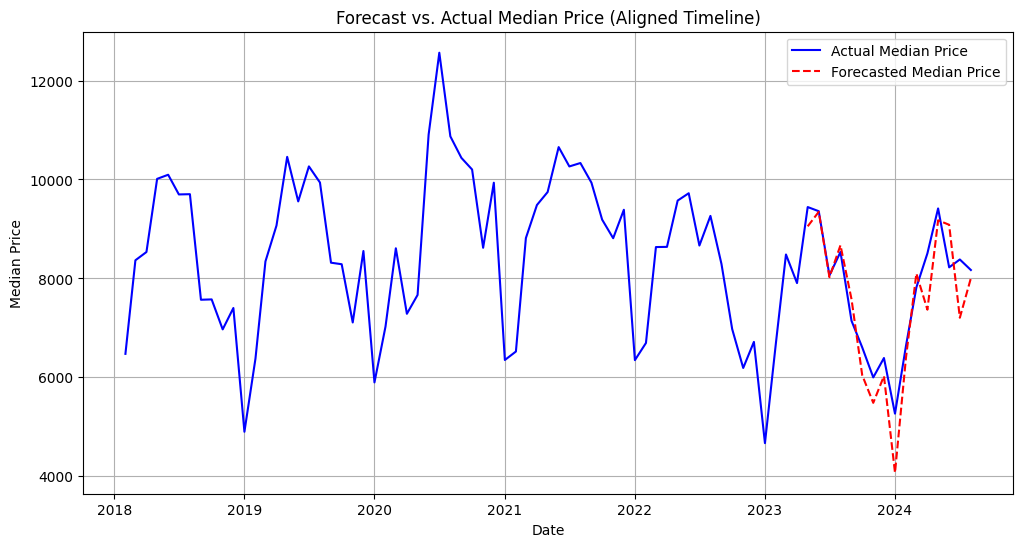

Forecasted vs Actual Data:
           ds     y    forecast  reversed_forecast
63 2023-05-01  9443 -520.596313        9053.403687
64 2023-06-01  9359 -375.690430        9346.309570
65 2023-07-01  8061 -640.480286        8024.519714
66 2023-08-01  8535 -592.938782        8671.061218
67 2023-09-01  7143 -712.465820        7578.534180
68 2023-10-01  6606 -932.487122        6044.512878
69 2023-11-01  5999 -705.331238        5484.668762
70 2023-12-01  6391 -689.751648        6027.248352
71 2024-01-01  5266 -598.031250        4071.968750
72 2024-02-01  6644 -298.742767        6410.257233
73 2024-03-01  7818 -385.052673        8098.947327
74 2024-04-01  8507 -538.048279        7367.951721
75 2024-05-01  9415 -267.620483        9175.379517
76 2024-06-01  8224 -274.445679        9084.554321
77 2024-07-01  8383 -856.184509        7204.815491
78 2024-08-01  8170 -529.795715        8005.204285


In [ ]:
# Reverse seasonal differencing consistently
data['forecast'] = np.nan  # Initialize the forecast column with NaN
data.iloc[-len(y_test):, data.columns.get_loc('forecast')] = y_pred_reduced  # Fill forecast for the test data range
data['reversed_forecast'] = data['forecast'] + data['y'].shift(12)  # Reverse seasonal differencing for the forecast

# Plot the results across the full dataset
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Median Price', color='blue')  # Plot the full actual data
plt.plot(data['ds'], data['reversed_forecast'], label='Forecasted Median Price', color='red', linestyle='--')  # Overlay forecast

# Add title and labels for consistency
plt.title('Forecast vs. Actual Median Price (Aligned Timeline)')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.legend()
plt.grid(True)
plt.show()

# Display forecasted vs actual values for the test period
forecast_df = data[['ds', 'y', 'forecast', 'reversed_forecast']].iloc[-len(y_test):]
print("Forecasted vs Actual Data:")
print(forecast_df)


#### Forecast into future

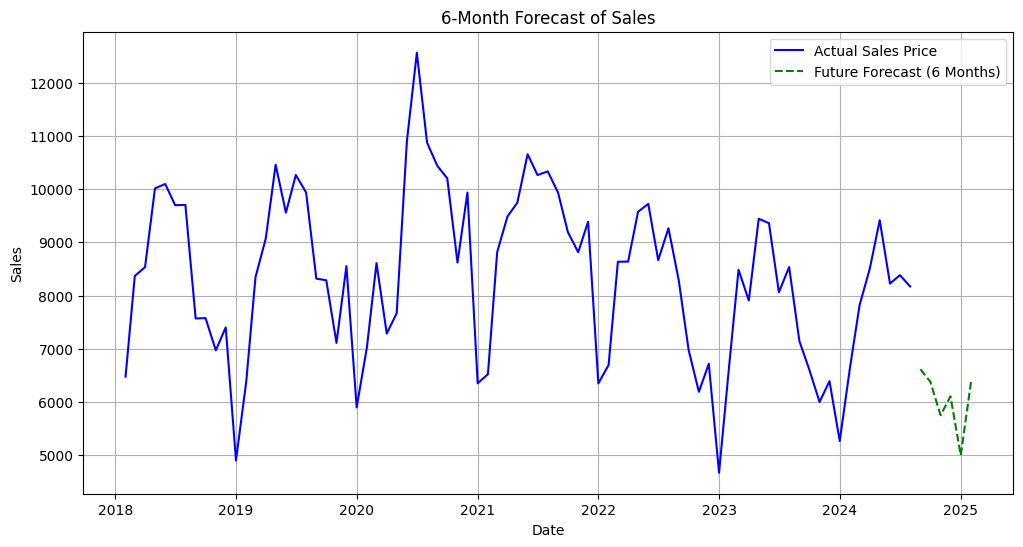

Future Forecast for the Next 6 Months:
          ds    forecast  reversed_forecast
0 2024-09-01 -529.795715        6613.204285
1 2024-10-01 -225.415924        6380.584076
2 2024-11-01 -248.898636        5750.101364
3 2024-12-01 -285.786285        6105.213715
4 2025-01-01 -270.640350        4995.359650
5 2025-02-01 -270.640350        6373.359650


In [ ]:
# Prepare for future prediction
future_lags = X_reduced[-1].reshape(1, -1)  # Start with the last reduced feature set
future_forecast = []

for _ in range(6):  # Predict for 6 months
    next_pred = best_model_reduced.predict(future_lags)[0]  # Predict the next value
    future_forecast.append(next_pred)  # Store the prediction

    # Update lag features
    new_lags = np.roll(future_lags, -1)  # Shift lags to the left
    new_lags[0, -len(important_features):] = next_pred  # Append the new prediction as the most recent lag
    future_lags = new_lags.reshape(1, -1)  # Reshape for the next iteration

# Reverse seasonal differencing for the forecast
future_forecast_rescaled = [
    future_forecast[i] + data['y'].iloc[-12 + i] for i in range(len(future_forecast))
]

# Generate future dates
last_date = data['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=7, freq='MS')[1:]

# Create a DataFrame for the future forecast
future_df = pd.DataFrame({
    'ds': future_dates,
    'forecast': future_forecast,
    'reversed_forecast': future_forecast_rescaled
})

# Plot future predictions along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Actual Sales Price', color='blue')  # Historical data
plt.plot(future_df['ds'], future_df['reversed_forecast'], label='Future Forecast (6 Months)', color='green', linestyle='--')  # Future forecast

# Add plot details
plt.title('6-Month Forecast of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print the future forecast
print("Future Forecast for the Next 6 Months:")
print(future_df)


#### Key Insights:

1. Decrease in Forecast: The forecast initially predicts a decline in sales, reaching a lower level before showing some recovery.
2. Continued Volatility: Similar to historical data, the forecasted sales exhibit some fluctuation, suggesting that the market is expected to remain volatile in the short term.
3. Lower Levels: The forecasted values remain significantly below the previous highs, indicating potential continued weakness in sales compared to earlier periods.
4. Limited Confidence in Growth: The model does not predict a sharp recovery or return to previous peak values, suggesting limited confidence in a strong rebound.

Sep Actual 7231 - FRED